# Project 1: Driving Licenses, Traffic Accidents and Casualties Analysis

## Problem Statment

in saudi 2017, the stat says there is an accident every minute, 20 deaths daily on Saudi roads. the object of this report is to identify the changing trends and crucial preventive approaches to road traffic accidents (RTAs) adopted in the Kingdom of Saudi Arabia (KSA) over 2016 and 2017.


## Executive Summary


This report provides an analysis and evaluation of the current status of accidents rate in Saudi Arabia in the years of 2016 and 2017, the data involved are from the Traffic department, includes several features like the number of accidents, number of casualties, also when and where, the used methods involved checking for trends, relationships, issues in some of the mentioned regions that sparked between the others.

The result from the analyzed data is that we focused more on 3 regions which are Makkah, Eastern province and Riyadh due to the huge difference in the rates of accidents, the number of issued licenses and the number of casualties either dead or injured between in theses regions and the others. 

after further analysis to these areas we relate this difference to 3 reasons, the nationality of the population in each of these 3 regions obtained from the general authority of statistics, types, and quantity of the Traffic Violations in each of these 3 regions obtained from the general authority of statistics, the number of slums neighborhoods in each of those regions.

the report discusses the 3 mentioned reasons in detail, identifies them as the mean weakness and the main reason for the current Saudi issue.

recomandation desussed include:

1- remove the slums neighborhoods 

2-  foucs on minimizing thr number of the illegal immigrants, espicially in makkah.

3- emphisis on more restrections regarding the above mentioned 3 types of Traffic Violation.

### Contents:
- [Datasets Description](#Datasets-Description)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here, including any Jupyter magic commands*

In [214]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

np.set_printoptions(precision=4)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline


sns.set(font_scale=1.5)
import math
from sklearn.preprocessing import StandardScaler


## Datasets Description

[Driving Licenses](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-driving-licenses-issued-in-the-kingdom-2004-2008/information/?disjunctive.administritive_area&sort=time_period&location=5,24.37495,45.08024&basemap=jawg.streets)
This dataset contains Saudi Arabia Driving Licenses Issued By Administrative Area for 1993 - 2016. Data from General Authority for Statistics . Follow datasource.kapsarc.org for timely data to advance energy economics research.

[Traffic Accidents and Casualties](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-traffic-accidents-and-casualties-injured-dead-2008/export/?disjunctive.region&disjunctive.indicator&sort=time_period)
This dataset contains Saudi Arabia Traffic Accidents and Casualties by Region for 2016. Data from General Authority for Statistics. Follow datasource.kapsarc.org for timely data to advance energy economics research.


## Data Import and Cleaning

#### 1. Read In Driving Licenses & Traffic Accidents Data
Read in the `saudi-arabia-traffic-accidents-2008.csv` and `saudi-arabia-driving-licenses-2004-2008.csv` files and assign them to appropriately named pandas dataframes.

In [215]:
Driving_Licenses= pd.read_csv("saudi-arabia-driving-licenses-2004-2008.csv",sep=";")

In [216]:
Traffic_Accidents=pd.read_csv("saudi-arabia-traffic-accidents-2008.csv",sep=";")

#### 2. Display data

Print the first 10 rows of each dataframe to your jupyter notebook

In [217]:
Driving_Licenses.head(10)

,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d
0,0,(2012),Makkah,143954n,"21.628962766, 41.2636898334"
1,1,(1994),Makkah,75349n,"21.628962766, 41.2636898334"
2,2,(1998),Makkah,86082n,"21.628962766, 41.2636898334"
3,3,(2004),Makkah,86636n,"21.628962766, 41.2636898334"
4,4,(2005),Makkah,65099n,"21.628962766, 41.2636898334"
5,5,(2008),Makkah,77013n,"21.628962766, 41.2636898334"
6,6,(2014),Madinah,31447n,"24.927534539, 39.4918237173"
7,7,(2013),Madinah,28513n,"24.927534539, 39.4918237173"
8,8,(2012),Madinah,14459n,"24.927534539, 39.4918237173"
9,9,(1994),Madinah,3767n,"24.927534539, 39.4918237173"


In [218]:
Traffic_Accidents.head(10)

,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d
0,0,0,(2016),Makkah,No. of Casualties - Injured,12383n,"21.628962766, 41.2636898334"
1,1,1,(2016),Eastern Region,No. of Casualties - Dead,1113n,"23.2883307307, 50.1478302439"
2,2,2,(2016),Tabouk,No. of Casualties - Dead,434n,"27.90165499, 37.2598581394"
3,3,3,(2016),Hail,No. of Casualties - Dead,299n,"27.400845724, 41.4406960508"
4,4,4,(2016),Hail,No. of Accidents,10199n,"27.400845724, 41.4406960508"
5,5,5,(2016),Northern Boarder,No. of Casualties - Dead,193n,"30.197074783, 41.8171186952"
6,6,6,(2017),Jazan,No. of Accidents,22161n,"17.2072313962, 42.6525807422"
7,7,7,(2017),Al-Jouf,No. of Accidents,10469n,"29.9677445762, 39.5570371172"
8,8,8,(2017),Total,No. of Casualties - Dead,7489n,NaN
9,9,9,(2016),Northern Boarder,No. of Casualties - Injured,631n,"30.197074783, 41.8171186952"


#### 3. Briefly describe the data

Take your time looking through the data and briefly describe the data in the markdown cell below. Note things about what the columns might mean, and the general information that is conveyed in the dataframe.

Answer:
Driving_Licenses dataframe columns:
    unnamed: acts like an index
    year: the year when the the driver licens where issued  
    Administritive Area: the province where the licenses where issued
    Driving Liceses: the number of driver licenses 
    geo_point_2d: the location of the Administritive region in which the licenses where issued 



for the Traffic_Accidents dataframe columns:
    unnamed: act like an index
    year: when the accedents happend
    region : where it happend 
    indecator: diffent labels for diffrent statists like the number of injured people and the number of deaths ets...
    value: the value of the prevusly labeld column ( indecator )
    geo_point_2d: the location of the Administritive region in which where the accedints happend.

    




#### 4a. How complete is the data?

Investigate missing values etc.

In [219]:
# we have a 25 missing cell in the geo_point_2d column, other than that all good 
Driving_Licenses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
Unnamed: 0             350 non-null int64
Year                   350 non-null object
Administritive Area    350 non-null object
Driving Liceses        350 non-null object
geo_point_2d           325 non-null object
dtypes: int64(1), object(4)
memory usage: 13.8+ KB


In [220]:
# invastigating the missing data in the geo_point_2d column, we found out that the missings represent the location
# of saudi arabia and not a certin region by itself, that's why it's not importent to be filled. 
#these rows describes the total value for saudi in that year, we can calculate it manully later on. 
#we will remove them becuse some of the functions won't proparly oprate on the row as long as it contain missing values.
Driving_Licenses[Driving_Licenses["geo_point_2d"].isnull()].head()

,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d
58,58,(2015),Total,435439n,NaN
59,59,(2017),Total,928165n,NaN
60,60,(1993),Total,294893n,NaN
61,61,(1994),Total,303520n,NaN
62,62,(2003),Total,254858n,NaN


In [221]:
Traffic_Accidents.info()
# we have 6 cells missing in the geo_point_2d column, other than that all good 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 7 columns):
Unnamed: 0      84 non-null int64
Unnamed: 0.1    84 non-null int64
Year            84 non-null object
Region          84 non-null object
Indicator       84 non-null object
Value           84 non-null object
geo_point_2d    78 non-null object
dtypes: int64(2), object(5)
memory usage: 4.7+ KB


In [222]:
# invastigating the missing data in the geo_point_2d column, we found out that the missings represent the location
# of saudi arabia and not a certin region by itself, that's why it's not importent to be filled.
#these rows describes the total value for saudi in that year, we can calculate it manully later on. 
#we will remove them becuse some of the functions won't proparly oprate on the row as long as it contain missing values.
Traffic_Accidents[Traffic_Accidents["geo_point_2d"].isnull()]

,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d
8,8,8,(2017),Total,No. of Casualties - Dead,7489n,NaN
29,29,29,(2016),Total,No. of Accidents,533380n,NaN
30,30,30,(2016),Total,No. of Casualties - Injured,38120n,NaN
68,68,68,(2017),Total,No. of Accidents,460488n,NaN
69,69,69,(2017),Total,No. of Casualties - Injured,33199n,NaN
77,77,77,(2016),Total,No. of Casualties - Dead,9031n,NaN


#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each dataset? What is the maximum *possible* value?**

4b

#in the Driving_Licenseswe dataframe we have spicial character in all the entries of both columns (year and Driving Liceses) need to be removed. the () in the year column and the n latter in the Driving Liceses column

#in the Traffic_Accidents dataframe we have repeted column (unnamed: 0) and (unnamed:0.1), and both of them are usless since they act as an index so we need to rempoe them all.

#in both dataframes we have columns name with special character (best to be changed) 

#deal with null cells in both dataframe. 
    



In [223]:
Traffic_Accidents.min()

Unnamed: 0                     0
Unnamed: 0.1                   0
Year                      (2016)
Region                  Al-Baaha
Indicator       No. of Accidents
Value                      1007n
dtype: object

In [224]:
Traffic_Accidents.max()

Unnamed: 0                               83
Unnamed: 0.1                             83
Year                                 (2017)
Region                                Total
Indicator       No. of Casualties - Injured
Value                                99925n
dtype: object

#### 5. What are your data types? 
Display the data types of each feature. 

In [225]:
Driving_Licenses.dtypes

Unnamed: 0              int64
Year                   object
Administritive Area    object
Driving Liceses        object
geo_point_2d           object
dtype: object

In [226]:
Traffic_Accidents.dtypes

Unnamed: 0       int64
Unnamed: 0.1     int64
Year            object
Region          object
Indicator       object
Value           object
geo_point_2d    object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:
#some of the numaric values in both dataframes are type object  (string)
    1- in the Driving_Licenses dataframe we have : year, driver license and geo_point_2d as type object (string)==> must be integer and flouat 
    2- in the Traffic_Accidents :year, value and the geo_point_2d as type objects (string)==> must be integer and flouat 

#### 6. Fix incorrect data types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert numerical columns to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [227]:
#removing the "()" from the year column in both dataframes
Driving_Licenses["Year"]= Driving_Licenses.Year.apply(lambda x:x.replace("(","").replace(")",""))
Traffic_Accidents["Year"]= Traffic_Accidents.Year.apply(lambda x:x.replace("(","").replace(")",""))


#removing the "n" from the driver license values in the Driving_Licenses dataframe.
Driving_Licenses["Driving Liceses"]= Driving_Licenses["Driving Liceses"].str.replace("n","")

#removing the value of the indecator in the Traffic_Accidents dataframe
Traffic_Accidents["Value"]= Traffic_Accidents.Value.apply(lambda x:x.replace("n",""))




In [228]:
#changing the type of all the string columns that should have been as an integer or flouat in both data frames
Driving_Licenses["Year"] = Driving_Licenses["Year"].apply(pd.to_numeric)
Traffic_Accidents["Year"] = Traffic_Accidents["Year"].apply(pd.to_numeric)
Driving_Licenses["Driving Liceses"] = Driving_Licenses["Driving Liceses"].apply(pd.to_numeric)
Traffic_Accidents["Value"] = Traffic_Accidents["Value"].apply(pd.to_numeric)


In [229]:
Traffic_Accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 7 columns):
Unnamed: 0      84 non-null int64
Unnamed: 0.1    84 non-null int64
Year            84 non-null int64
Region          84 non-null object
Indicator       84 non-null object
Value           84 non-null int64
geo_point_2d    78 non-null object
dtypes: int64(4), object(3)
memory usage: 4.7+ KB


In [230]:
Driving_Licenses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
Unnamed: 0             350 non-null int64
Year                   350 non-null int64
Administritive Area    350 non-null object
Driving Liceses        350 non-null int64
geo_point_2d           325 non-null object
dtypes: int64(3), object(2)
memory usage: 13.8+ KB


- Make new columns `x` and `y` using `geo_point_2d`

In [231]:
#splitting them into a new dataframe and then include that data frame back to the orignal (expand = True)
xy= Driving_Licenses.geo_point_2d.str.split (",", expand=True)
Driving_Licenses["x"]=xy[0]
Driving_Licenses["y"]=xy[1]

xy.head()

,0,1
0,21.628962766,41.2636898334
1,21.628962766,41.2636898334
2,21.628962766,41.2636898334
3,21.628962766,41.2636898334
4,21.628962766,41.2636898334


In [232]:
Driving_Licenses.head()

,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d,x,y
0,0,2012,Makkah,143954,"21.628962766, 41.2636898334",21.628962766,41.2636898334
1,1,1994,Makkah,75349,"21.628962766, 41.2636898334",21.628962766,41.2636898334
2,2,1998,Makkah,86082,"21.628962766, 41.2636898334",21.628962766,41.2636898334
3,3,2004,Makkah,86636,"21.628962766, 41.2636898334",21.628962766,41.2636898334
4,4,2005,Makkah,65099,"21.628962766, 41.2636898334",21.628962766,41.2636898334


In [233]:
#splitting them into a new dataframe and then include that data frame back to the orignal (expand = True)

ty = Traffic_Accidents.geo_point_2d.str.split (",",expand=True)
Traffic_Accidents["x"]=ty[0]
Traffic_Accidents["y"]=ty[1]
ty.head()

,0,1
0,21.628962766,41.2636898334
1,23.2883307307,50.1478302439
2,27.90165499,37.2598581394
3,27.400845724,41.4406960508
4,27.400845724,41.4406960508


In [234]:
Traffic_Accidents.head()

,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d,x,y
0,0,0,2016,Makkah,No. of Casualties - Injured,12383,"21.628962766, 41.2636898334",21.628962766,41.2636898334
1,1,1,2016,Eastern Region,No. of Casualties - Dead,1113,"23.2883307307, 50.1478302439",23.2883307307,50.1478302439
2,2,2,2016,Tabouk,No. of Casualties - Dead,434,"27.90165499, 37.2598581394",27.90165499,37.2598581394
3,3,3,2016,Hail,No. of Casualties - Dead,299,"27.400845724, 41.4406960508",27.400845724,41.4406960508
4,4,4,2016,Hail,No. of Accidents,10199,"27.400845724, 41.4406960508",27.400845724,41.4406960508


In [235]:
#changing the new columns in Driving_Licenses dataframe to flouat  
Driving_Licenses["x"]=Driving_Licenses["x"].apply(pd.to_numeric)
Driving_Licenses["y"]=Driving_Licenses["y"].apply(pd.to_numeric)

In [236]:
Driving_Licenses.dtypes

Unnamed: 0               int64
Year                     int64
Administritive Area     object
Driving Liceses          int64
geo_point_2d            object
x                      float64
y                      float64
dtype: object

In [237]:
#changing the new columns in Traffic_Accidents dataframe to flouat  
Traffic_Accidents["x"]=Traffic_Accidents["x"].apply(pd.to_numeric)
Traffic_Accidents["y"]=Traffic_Accidents["y"].apply(pd.to_numeric)


In [238]:
Traffic_Accidents.dtypes

Unnamed: 0        int64
Unnamed: 0.1      int64
Year              int64
Region           object
Indicator        object
Value             int64
geo_point_2d     object
x               float64
y               float64
dtype: object

- Fix any individual values preventing other columns from being the appropriate type.

In [239]:
#droping the repeted (unnamed columns) in the Traffic_Accidents dataframe
Traffic_Accidents.drop(['Unnamed: 0.1'],axis=1,inplace=True)
Traffic_Accidents.drop(['Unnamed: 0'],axis=1,inplace=True)
#Traffic_Accidents.columns

In [240]:
#droping the repeted (unnamed columns) in the Traffic_Accidents dataframe
Driving_Licenses.drop(['Unnamed: 0'],axis=1,inplace=True)
#Driving_Licenses.columns

- Finish your data modifications by making sure the columns are now typed appropriately.

- Display the data types again to confirm they are correct.

In [241]:
Driving_Licenses.dtypes

Year                     int64
Administritive Area     object
Driving Liceses          int64
geo_point_2d            object
x                      float64
y                      float64
dtype: object

In [242]:
Traffic_Accidents.dtypes

Year              int64
Region           object
Indicator        object
Value             int64
geo_point_2d     object
x               float64
y               float64
dtype: object

#### 7. Rename columns
Change the names of the columns to more expressive names so that you can tell the difference the Driving Licenses  columns and the & Traffic Accidents columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these two datasets, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).
- Please also fix any typos you see in the column names.

In [243]:
#old columns names 
Traffic_Accidents.columns

Index(['Year', 'Region', 'Indicator', 'Value', 'geo_point_2d', 'x', 'y'], dtype='object')

In [244]:
##old columns names 
Driving_Licenses.columns

Index(['Year', 'Administritive Area', 'Driving Liceses', 'geo_point_2d', 'x',
       'y'],
      dtype='object')

In [245]:
Traffic_Accidents.rename(columns={"Year":"year","Region":"region","Indicator":"indicator","Value":"value",
                                 "geo_point_2d":"geopoint"},inplace=True)

Driving_Licenses.rename(columns={"Administritive Area":"region",
                                 "Driving Liceses":"licenses","geo_point_2d":"geopoint","Year":"year"},inplace=True)

In [246]:
#naw columns names 
Traffic_Accidents.columns

Index(['year', 'region', 'indicator', 'value', 'geopoint', 'x', 'y'], dtype='object')

In [247]:
##new columns names 
Driving_Licenses.columns

Index(['year', 'region', 'licenses', 'geopoint', 'x', 'y'], dtype='object')

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|year|int|Driving_Licenses & Traffic_Accidents|the year in which the data is refrencing | 
|region|object|Driving_Licenses & Traffic_Accidents|the region in which the either the driver licesnse & the accedents happend respectivley |  
|indicator|object|Traffic_Accidents|the accidents catagoreis | 
|licenses|int|Driving_Licenses |will show the number of the issued licenses in that region in that year |
|value|int|Traffic_Accidents|the value of the issued driver licenses and the number of the accedents | 
|geopoint|object|Driving_Licenses & Traffic_Accidents|shows the longitude and latitude of each region| 
|x|int|Driving_Licenses & Traffic_Accidents|shows tonly the longitude the region region|
|y|int|Driving_Licenses & Traffic_Accidents|shows tonly the latitude the region region|



#### 9. Drop unnecessary rows

This study concerns accident and license in regions/area. Please do the followings:
0. Which rows are not associated with regions?
1. Confirm the numbers of all regions add up to total.
2. Remove the rows that are not associated with regions

#Q:Which rows are not associated with regions?
#A: the row that describing the total number of accedents in the Traffic_Accidents dataframe (column region= total) and the rows that describing the total number of issued license in the Traffic_Accidents , column region= total





Q: Confirm the numbers of all regions add up to total.

A: in both dataframes, i sumeed the value of licenses column if the region is not total and compare it with the sum of the same column but if the region  is total. in both it'a the same as you will see in the following cells, so we can delete the "total" rows. 

in the Driving_Licenses data frame, both are equal to 9397488 

in the Traffic_Accidents data frame, both are equal to 1081707

In [248]:
# total number of licenses without considring the rows with the region labeld as "total"
x=Driving_Licenses[Driving_Licenses.region != "Total"]
y=x.licenses.sum()
y

9397488

In [249]:
# total number of licenses with only considring the rows with the region labeled as "total"
u=Driving_Licenses[Driving_Licenses.region == "Total"]
t=u.licenses.sum()
t


9397488

In [250]:
# doing the same procedure in the Traffic_Accidents datafreame 
# total number of  indecator's values without considring the rows with the region labeled as "total"
w=Traffic_Accidents[Traffic_Accidents.region != "Total"]
i=w.value.sum()
i


1081707

In [251]:
# total number of indecator's values with only considring the rows with the region labeled as "total"
q=Traffic_Accidents[Traffic_Accidents.region == "Total"]
r=q.value.sum()
r


1081707

In [252]:
c=Driving_Licenses[Driving_Licenses.region == "Total"].index
p=Traffic_Accidents[Traffic_Accidents.region=="Total"].index

In [253]:
#Remove the rows that are not associated with regions in Traffic_Accidents and the Driving_Licenses dataframe

Traffic_Accidents.drop(p,axis=0,inplace=True)
Driving_Licenses.drop(c,axis=0,inplace=True)

#### 10a. Data formats
Is the License data in long or wide format? How about the Accident data? And why?

In [254]:
Traffic_Accidents.region.unique()

array(['Makkah', 'Eastern Region', 'Tabouk', 'Hail', 'Northern Boarder',
       'Jazan', 'Al-Jouf', 'Al-Baaha', 'Riyadh', 'Madinah', 'Qassim',
       'Najran', 'Asir'], dtype=object)

In [255]:
Driving_Licenses.region.unique()

array(['Makkah', 'Madinah', 'Al-Qaseem', 'Eastern', 'Assir', 'Tabouk',
       'Hail', 'Northern Boarder', 'Jazan', 'Najran', 'Al-Baha',
       'Al-Jouf', 'Riyadh'], dtype=object)

In [256]:
#cahnged the name of the region in the 2 dataframes to be the same 

Traffic_Accidents.region= Traffic_Accidents.region.apply(lambda x:x.replace("Eastern Region","Eastern"))
Traffic_Accidents.region= Traffic_Accidents.region.apply(lambda x:x.replace("Al-Baaha","Al-Baha"))
Traffic_Accidents.region= Traffic_Accidents.region.apply(lambda x:x.replace("Qassim","Al-Qaseem"))
Driving_Licenses.region= Driving_Licenses.region.apply(lambda x:x.replace("Assir","Asir"))

In [257]:
#Driving_Licenses is wide because evey column is providing the full value of it
#for example, none of the columns needs another column to get the meaning of it.
Driving_Licenses.head()

,year,region,licenses,geopoint,x,y
0,2012,Makkah,143954,"21.628962766, 41.2636898334",21.628963,41.26369
1,1994,Makkah,75349,"21.628962766, 41.2636898334",21.628963,41.26369
2,1998,Makkah,86082,"21.628962766, 41.2636898334",21.628963,41.26369
3,2004,Makkah,86636,"21.628962766, 41.2636898334",21.628963,41.26369
4,2005,Makkah,65099,"21.628962766, 41.2636898334",21.628963,41.26369


In [258]:
Traffic_Accidents.head()
# it's a long format, because we have 2 columns expricing each other in a long format (indicator and value)
# they can't be saprated, if so, teither one of them will have a meaning, that's way it's in the long fomat

,year,region,indicator,value,geopoint,x,y
0,2016,Makkah,No. of Casualties - Injured,12383,"21.628962766, 41.2636898334",21.628963,41.263690
1,2016,Eastern,No. of Casualties - Dead,1113,"23.2883307307, 50.1478302439",23.288331,50.147830
2,2016,Tabouk,No. of Casualties - Dead,434,"27.90165499, 37.2598581394",27.901655,37.259858
3,2016,Hail,No. of Casualties - Dead,299,"27.400845724, 41.4406960508",27.400846,41.440696
4,2016,Hail,No. of Accidents,10199,"27.400845724, 41.4406960508",27.400846,41.440696


In [259]:
# change the format to wide by using pivot table 
Traffic_Accidents=pd.pivot_table(Traffic_Accidents,index=["year","region"] ,columns="indicator",
               values ="value")


In [260]:
#the new Traffic_Accidents table
Traffic_Accidents

indicator              No. of Accidents  No. of Casualties - Dead  \
year region                                                         
2016 Al-Baha                       3618                       185   
     Al-Jouf                      10212                       245   
     Al-Qaseem                    25664                       397   
     Asir                         32684                       983   
     Eastern                     101619                      1113   
     Hail                         10199                       299   
     Jazan                        25873                       514   
     Madinah                      14475                       822   
     Makkah                      134838                      2243   
     Najran                        3235                       173   
     Northern Boarder             13196                       193   
     Riyadh                      141736                      1430   
     Tabouk                       16031                       434   
2017 Al-Baha                       1414                       134   
     Al-Jouf                      10469                       240   
     Al-Qaseem                    22405                       319   
     Asir                         25245                       828   
     Eastern                      81433                       963   
     Hail                          9379                       265   
     Jazan                        22161                       466   
     Madinah                      16070                       580   
     Makkah                      145541                      1641   
     Najran                        3193                       194   
     Northern Boarder             11540                       112   
     Riyadh                       99925                      1399   
     Tabouk                       11713                       348   

indicator              No. of Casualties - Injured  
year region                                         
2016 Al-Baha                                  1227  
     Al-Jouf                                   920  
     Al-Qaseem                                1513  
     Asir                                     2541  
     Eastern                                  4893  
     Hail                                      932  
     Jazan                                    2259  
     Madinah                                  4184  
     Makkah                                  12383  
     Najran                                    706  
     Northern Boarder                          631  
     Riyadh                                   4207  
     Tabouk                                   1724  
2017 Al-Baha                                  1007  
     Al-Jouf                                   862  
     Al-Qaseem                                1446  
     Asir                                     2368  
     Eastern                                  4073  
     Hail                                      773  
     Jazan                                    2207  
     Madinah                                  2917  
     Makkah                                  10623  
     Najran                                    766  
     Northern Boarder                          374  
     Riyadh                                   4540  
     Tabouk                                   1243

In [261]:
Traffic_Accidents.loc[2016, 'Al-Baha']

indicator
No. of Accidents               3618
No. of Casualties - Dead        185
No. of Casualties - Injured    1227
Name: (2016, Al-Baha), dtype: int64

In [262]:
Traffic_Accidents

indicator              No. of Accidents  No. of Casualties - Dead  \
year region                                                         
2016 Al-Baha                       3618                       185   
     Al-Jouf                      10212                       245   
     Al-Qaseem                    25664                       397   
     Asir                         32684                       983   
     Eastern                     101619                      1113   
     Hail                         10199                       299   
     Jazan                        25873                       514   
     Madinah                      14475                       822   
     Makkah                      134838                      2243   
     Najran                        3235                       173   
     Northern Boarder             13196                       193   
     Riyadh                      141736                      1430   
     Tabouk                       16031                       434   
2017 Al-Baha                       1414                       134   
     Al-Jouf                      10469                       240   
     Al-Qaseem                    22405                       319   
     Asir                         25245                       828   
     Eastern                      81433                       963   
     Hail                          9379                       265   
     Jazan                        22161                       466   
     Madinah                      16070                       580   
     Makkah                      145541                      1641   
     Najran                        3193                       194   
     Northern Boarder             11540                       112   
     Riyadh                       99925                      1399   
     Tabouk                       11713                       348   

indicator              No. of Casualties - Injured  
year region                                         
2016 Al-Baha                                  1227  
     Al-Jouf                                   920  
     Al-Qaseem                                1513  
     Asir                                     2541  
     Eastern                                  4893  
     Hail                                      932  
     Jazan                                    2259  
     Madinah                                  4184  
     Makkah                                  12383  
     Najran                                    706  
     Northern Boarder                          631  
     Riyadh                                   4207  
     Tabouk                                   1724  
2017 Al-Baha                                  1007  
     Al-Jouf                                   862  
     Al-Qaseem                                1446  
     Asir                                     2368  
     Eastern                                  4073  
     Hail                                      773  
     Jazan                                    2207  
     Madinah                                  2917  
     Makkah                                  10623  
     Najran                                    766  
     Northern Boarder                          374  
     Riyadh                                   4540  
     Tabouk                                   1243

In [263]:
Traffic_Accidents.columns

Index(['No. of Accidents', 'No. of Casualties - Dead',
       'No. of Casualties - Injured'],
      dtype='object', name='indicator')

#### 10b. Changing formats
Which format would work best for both dataframes? Transform the datasets to the same format before merging in the next task.

wide, we can merge them after making them the same form (wide)
i achieved that by implementing a pivot table on the Traffic_Accidents dataframe

#### 11. Merge dataframes

Join the Driving Licenses & Traffic Accidents dataframes using the **region** and **year** in each dataframe as the key. Assign this to a new variable. Which join should you use to preserve the most data?

In [264]:
# DL= Driving_Licenses dataframe
# TA= Traffic_Accidents dataframe
combined_datasets=pd.merge(Driving_Licenses,Traffic_Accidents,on =["year","region"], how= "outer")
combined_datasets.head()


,year,region,licenses,geopoint,x,y,No. of Accidents,No. of Casualties - Dead,No. of Casualties - Injured
0,2012,Makkah,143954,"21.628962766, 41.2636898334",21.628963,41.26369,NaN,NaN,NaN
1,1994,Makkah,75349,"21.628962766, 41.2636898334",21.628963,41.26369,NaN,NaN,NaN
2,1998,Makkah,86082,"21.628962766, 41.2636898334",21.628963,41.26369,NaN,NaN,NaN
3,2004,Makkah,86636,"21.628962766, 41.2636898334",21.628963,41.26369,NaN,NaN,NaN
4,2005,Makkah,65099,"21.628962766, 41.2636898334",21.628963,41.26369,NaN,NaN,NaN


In [265]:
combined_datasets.info()
#combined_datasets[(combined_datasets.year==2016) | (combined_datasets.year==2017)]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325 entries, 0 to 324
Data columns (total 9 columns):
year                           325 non-null int64
region                         325 non-null object
licenses                       325 non-null int64
geopoint                       325 non-null object
x                              325 non-null float64
y                              325 non-null float64
No. of Accidents               26 non-null float64
No. of Casualties - Dead       26 non-null float64
No. of Casualties - Injured    26 non-null float64
dtypes: float64(5), int64(2), object(2)
memory usage: 25.4+ KB


#### 12. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_datasets.csv`.

In [266]:
combined_datasets.to_csv('combined_datasets.csv')


## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [267]:
combined_datasets.describe()

,year,licenses,x,y,No. of Accidents,No. of Casualties - Dead,No. of Casualties - Injured
count,325.000000,325.000000,325.000000,325.000000,26.000000,26.000000,26.000000
mean,2005.000000,28915.347692,23.810447,42.602789,38225.692308,635.384615,2743.038462
std,7.222222,47419.058819,4.197987,3.254196,46493.705035,549.783381,2922.641127
min,1993.000000,915.000000,17.207231,37.259858,1414.000000,112.000000,374.000000
25%,1999.000000,4846.000000,20.148406,41.263690,10276.250000,241.250000,923.000000
50%,2005.000000,10267.000000,23.288331,41.817119,16050.500000,415.500000,1618.500000
75%,2011.000000,25423.000000,27.400846,43.343000,30981.250000,929.250000,3784.000000
max,2017.000000,495307.000000,30.197075,50.147830,145541.000000,2243.000000,12383.000000


In [268]:
combined_datasets.columns

Index(['year', 'region', 'licenses', 'geopoint', 'x', 'y', 'No. of Accidents',
       'No. of Casualties - Dead', 'No. of Casualties - Injured'],
      dtype='object')

#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [269]:
#this is the population standard deviation
def STD(df):
    df=df.dropna()
    n=len(df)
    mean=sum(df)/n
    s= []
    for i in df:
        s.append((i - mean)**2)
    summation=sum(s)
    p=1/n
    std= math.sqrt(p*summation)
    return std

In [270]:
STD(combined_datasets.year)

7.211102550927978

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'Driving_Licenses_x': 120, 'Traffic_Accidents_x': 120, ...}`

In [271]:
# #t ={"year":STD(combined_datasets.year),"licenses":STD(combined_datasets.licenses),
#             "x":STD(combined_datasets.x),"y":STD(combined_datasets.y),
#             "No. of Accidents":STD(combined_datasets["No. of Accidents"]),
#             "No. of Casualties - Dead":STD(combined_datasets["No. of Casualties - Dead"]),
#             "No. of Casualties - Injured":STD(combined_datasets["No. of Casualties - Injured"])}
#t

x=list(combined_datasets.columns)



d={t:STD(combined_datasets[t]) for t in x if combined_datasets[t].dtype !=object}
d

{'year': 7.211102550927978,
 'licenses': 47346.0502174464,
 'x': 4.191524025811861,
 'y': 3.2491853051316912,
 'No. of Accidents': 45590.82869880505,
 'No. of Casualties - Dead': 539.1069593406002,
 'No. of Casualties - Injured': 2865.885411322023}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer:

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017)
- Which regions have the highest and lowest mean Traffic Accidents numbers for years (2016 - 2017)
- What are the regions that have more Driving Licenses issued in each year than the year average?
- What are the regions that have more Traffic Accidents happened in each year than the year average?

Based on what you've just observed, have you identified any regions that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

# Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017)

In [348]:
table = pd.pivot_table(combined_datasets, values='licenses', index=['region'],columns ="year")
table.head()

year,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
region,,,,,,,,,,,,,,,,,,,,,
Al-Baha,3270,2729,2423,1468,3027,5110,4246,4832,7594,3335,...,5418,9815,7076,6450,7593,7482,7268,4856,4614,4131
Al-Jouf,2884,2535,2270,2518,3565,3476,3950,4666,4756,5940,...,10929,10567,10937,10180,10246,11602,9982,10233,9371,8091
Al-Qaseem,73618,68916,49690,42693,10092,11350,9983,12226,14718,16298,...,22236,27571,36737,10760,11421,17889,29113,13631,9180,6318
Asir,6226,5185,4889,3319,12204,13220,14625,18622,20321,20417,...,18800,21582,21835,24515,23136,29730,29552,38567,41367,39133
Eastern,9964,10918,7831,8461,58814,70650,64973,65767,74119,85035,...,104626,108544,110295,151087,129971,123325,121774,135752,142307,126816


In [349]:
#maximum
col = []
min_ = []
name = []
d=list(table.columns) 
maxm=0
l = []
indexes = table.index
maxm_i=0
for j in d:
    counter = 0
    for i in table[j]:
        if i > maxm:
            maxm = i
            maxm_i = counter
        counter +=1
       
    #print(j,maxm,indexes[maxm_i])
    col.append(j)
    min_.append(maxm)
    name.append(indexes[maxm_i])
    maxm=0
r=pd.DataFrame({'year':col , 'maximum value':min_ , 'region':name })

In [350]:
r.head()

,year,maximum value,region
0,1993,103886,Riyadh
1,1994,110545,Riyadh
2,1995,101608,Riyadh
3,1996,110131,Riyadh
4,1997,92145,Riyadh


In [351]:
# #minimum 
col = []
min_ = []
name = []
maxm=10000000000
l = []
indexes = table.index
maxm_i=0
for j in d:
    counter = 0
    for i in table[j]:
        if i < maxm:
            maxm = i
            maxm_i = counter
        counter +=1
        
    #print(j,maxm,indexes[maxm_i])
    col.append(j)
    min_.append(maxm)
    name.append(indexes[maxm_i])
    maxm=10000000000
e=pd.DataFrame({'year':col , 'minimum value':min_ , 'region':name })

In [352]:
e.head()

,year,minimum value,region
0,1993,1510,Northern Boarder
1,1994,1457,Northern Boarder
2,1995,1318,Northern Boarder
3,1996,1383,Northern Boarder
4,1997,1531,Northern Boarder


In [295]:
d=pd.merge(e,r,on =["year"], how= "outer")
d.sort_values(by="year",ascending=False)

,year,minimum value,region_x,maximum value,region_y
24,2017,4131,Al-Baha,495307,Riyadh
23,2016,2153,Najran,242851,Riyadh
22,2015,915,Tabouk,157389,Makkah
21,2014,5009,Northern Boarder,194208,Riyadh
20,2013,3921,Northern Boarder,165994,Riyadh
19,2012,3706,Northern Boarder,143954,Makkah
18,2011,4314,Northern Boarder,151087,Eastern
17,2010,3064,Northern Boarder,113531,Makkah
16,2009,3649,Northern Boarder,112045,Makkah
15,2008,3519,Northern Boarder,104626,Eastern


In [296]:
Traffic_Accidents.head()

indicator       No. of Accidents  No. of Casualties - Dead  \
year region                                                  
2016 Al-Baha                3618                       185   
     Al-Jouf               10212                       245   
     Al-Qaseem             25664                       397   
     Asir                  32684                       983   
     Eastern              101619                      1113   

indicator       No. of Casualties - Injured  
year region                                  
2016 Al-Baha                           1227  
     Al-Jouf                            920  
     Al-Qaseem                         1513  
     Asir                              2541  
     Eastern                           4893

# Which regions have the highest and lowest mean Traffic Accidents numbers for years (2016 - 2017)

In [297]:
# in this table we are only considring the No. of Accidents	 as an indicatior
Traffic_Accidents12=Traffic_Accidents[["No. of Accidents"]]
Traffic_Accidents12.head()

indicator       No. of Accidents
year region                     
2016 Al-Baha                3618
     Al-Jouf               10212
     Al-Qaseem             25664
     Asir                  32684
     Eastern              101619

In [298]:
#the mean for each region (2016-2017)
Traffic_Accidents12.groupby("region").mean()

indicator,No. of Accidents
region,
Al-Baha,2516.0
Al-Jouf,10340.5
Al-Qaseem,24034.5
Asir,28964.5
Eastern,91526.0
Hail,9789.0
Jazan,24017.0
Madinah,15272.5
Makkah,140189.5


#the maximum mean is makkah with an avrege of 140189.5 Accidents 
#the minimum is Al-Baha with an avrege of 2516 Accidents

# What are the regions that have more Driving Licenses issued in each year than the year average?

In [299]:
Driving_Licenses12=Driving_Licenses[["year","region","licenses"]]
Driving_Licenses12.head()

,year,region,licenses
0,2012,Makkah,143954
1,1994,Makkah,75349
2,1998,Makkah,86082
3,2004,Makkah,86636
4,2005,Makkah,65099


In [300]:
b=Driving_Licenses.groupby("year").mean().licenses
e=pd.DataFrame(data=b) # this is the mean issued Licenses each year
e.reset_index().head()

,year,licenses
0,1993,22684.076923
1,1994,23347.692308
2,1995,19375.230769
3,1996,18278.692308
4,1997,22253.538462


In [346]:
#merging the 2 tabls and then masking only the result that have more
#Driving Licenses issued in each year than the year average


merged_table=pd.merge(e,Driving_Licenses12,on =["year"], how= "outer")
merged_table=merged_table[merged_table.licenses_y>merged_table.licenses_x]
final=merged_table[merged_table.licenses_y>merged_table.licenses_x]
final.reset_index()

,index,year,licenses_x,region,licenses_y
0,3,1993,22684.076923,Riyadh,103886
1,4,1993,22684.076923,Makkah,65977
2,10,1993,22684.076923,Al-Qaseem,73618
3,13,1994,23347.692308,Makkah,75349
4,16,1994,23347.692308,Al-Qaseem,68916
5,20,1994,23347.692308,Riyadh,110545
6,26,1995,19375.230769,Al-Qaseem,49690
7,32,1995,19375.230769,Riyadh,101608
8,33,1995,19375.230769,Makkah,60356
9,39,1996,18278.692308,Al-Qaseem,42693


# What are the regions that have more Traffic Accidents happened in each year than the year average?

In [302]:
t=Traffic_Accidents12.groupby("year").mean()
t.reset_index()

indicator,year,No. of Accidents
0,2016,41029.230769
1,2017,35422.153846


In [303]:
r=Traffic_Accidents12.reset_index()


In [304]:
acc_merg=pd.merge(r,t,on =["year"], how= "outer")
#acc_merg=merged_table[merged_table.licenses_y>merged_table.licenses_x]
acc_merg12=acc_merg[acc_merg["No. of Accidents_x"]>acc_merg["No. of Accidents_y"]]

acc_merg12





indicator,year,region,No. of Accidents_x,No. of Accidents_y
4,2016,Eastern,101619,41029.230769
8,2016,Makkah,134838,41029.230769
11,2016,Riyadh,141736,41029.230769
17,2017,Eastern,81433,35422.153846
21,2017,Makkah,145541,35422.153846
24,2017,Riyadh,99925,35422.153846


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

In [305]:
#I have created a new data frame where I only took the years of 2016 and 2017 
#since we only have the accidents for those years, I called it combined_datasets12


In [306]:
# i have crated a new dataframe where i only took the years of 2016 and 2017 
#since we only have the accedents for those years 
combined_datasets12=combined_datasets[["year","region","licenses","No. of Accidents","No. of Casualties - Dead",
                                       "No. of Casualties - Injured"]]
combined_datasets12=combined_datasets12[(combined_datasets12.year==2016) | (combined_datasets12.year==2017)].reset_index()
combined_datasets12.drop(columns="index",inplace =True)

combined_datasets12





,year,region,licenses,No. of Accidents,No. of Casualties - Dead,No. of Casualties - Injured
0,2017,Hail,22035,9379.0,265.0,773.0
1,2017,Northern Boarder,5280,11540.0,112.0,374.0
2,2016,Al-Baha,4614,3618.0,185.0,1227.0
3,2017,Al-Qaseem,6318,22405.0,319.0,1446.0
4,2017,Eastern,126816,81433.0,963.0,4073.0
5,2017,Tabouk,10232,11713.0,348.0,1243.0
6,2016,Northern Boarder,4958,13196.0,193.0,631.0
7,2016,Najran,2153,3235.0,173.0,706.0
8,2017,Makkah,142487,145541.0,1641.0,10623.0
9,2016,Makkah,136055,134838.0,2243.0,12383.0


In [307]:
correlation =combined_datasets12.corr()
correlation

,year,licenses,No. of Accidents,No. of Casualties - Dead,No. of Casualties - Injured
year,1.000000,0.084500,-0.061493,-0.110011,-0.066042
licenses,0.084500,1.000000,0.733692,0.680328,0.493111
No. of Accidents,-0.061493,0.733692,1.000000,0.917721,0.853038
No. of Casualties - Dead,-0.110011,0.680328,0.917721,1.000000,0.930090
No. of Casualties - Injured,-0.066042,0.493111,0.853038,0.930090,1.000000


Text(0.5, 1, 'Correlation')

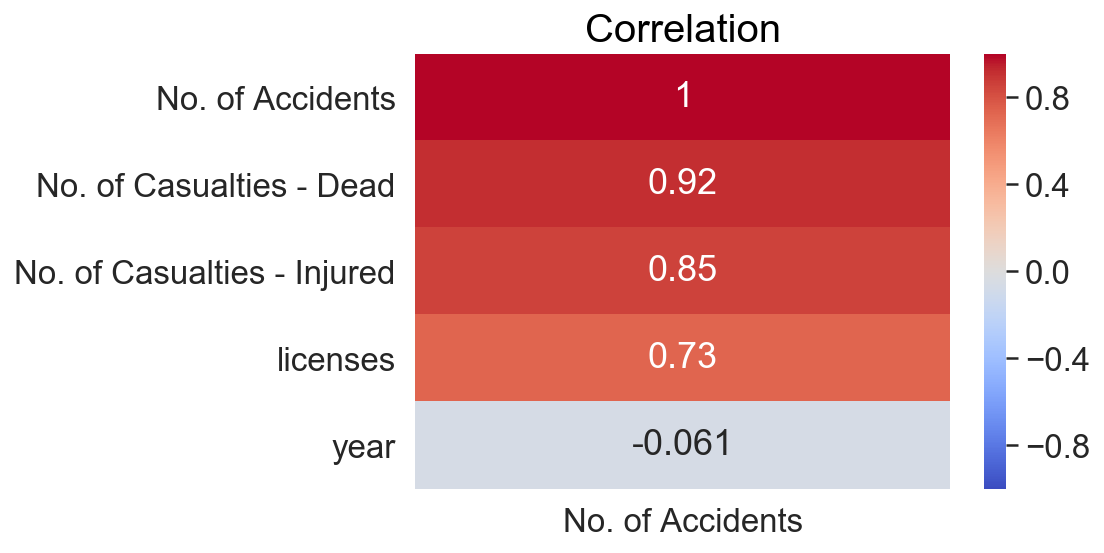

In [308]:

#sns.heatmap(correlation,annot=True,vmin =-1,vmax=1,linewidths=.5,cmap="rainbow")
sns.heatmap(correlation[['No. of Accidents']].sort_values(by=['No. of Accidents'],ascending=False),
            vmin=-1,
            cmap='coolwarm',
            annot=True);
font = {
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
plt.title ("Correlation",fontdict=font)

#### Define a custom function to subplot histograms

We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [309]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles,list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(10,10)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column],bins=50) # feel free to add more settings
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])
        # Set titles, labels, etc here for each subplot
    plt.tight_layout()
        


#### Plot and interpret histograms 
For each of the following:
- Driving Licenses number
- Traffic Accidents number

Please plot two additional histograms that will help with your understanding of the data

//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<Figure size 720x720 with 0 Axes>

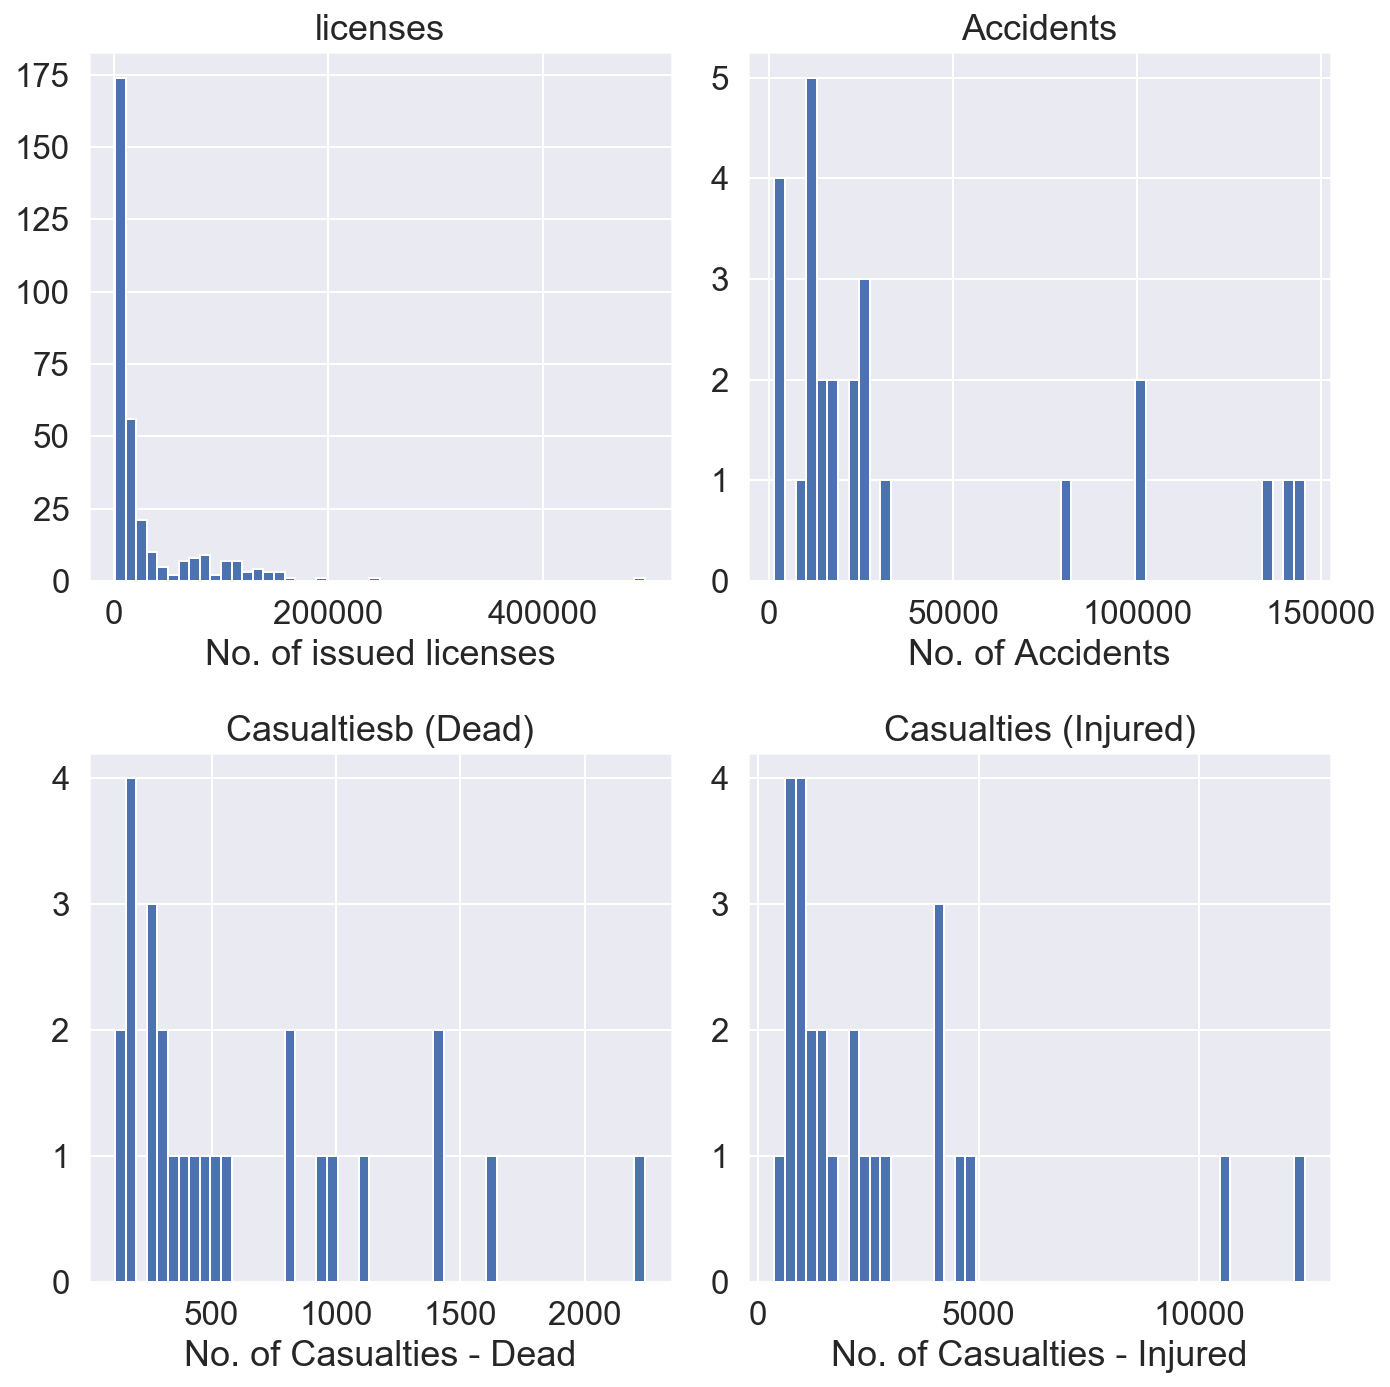

In [310]:
plt.figure(figsize=(10,10))

subplot_histograms(combined_datasets,
                   list_of_columns=["licenses","No. of Accidents","No. of Casualties - Dead","No. of Casualties - Injured"],
                   list_of_titles=["licenses","Accidents","Casualtiesb (Dead)","Casualties (Injured)"],
                   list_of_xlabels=["No. of issued licenses","No. of Accidents","No. of Casualties - Dead","No. of Casualties - Injured"])


# intrepertion:

1-none of them is normally distrbuted 

2- we have outliers in every one of the above classes 

#### Plot and interpret scatter plots

For each of the following:
- Driving Licenses vs. Traffic Accidents for 2017
- Driving Licenses vs. Traffic Accidents for 2016
- Driving Licenses for 2016 vs 2017
- Traffic Accidents for 2016 vs 2017

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [311]:
combined_datasets12.columns

Index(['year', 'region', 'licenses', 'No. of Accidents',
       'No. of Casualties - Dead', 'No. of Casualties - Injured'],
      dtype='object')

In [312]:
combined_datasets2017=combined_datasets12[(combined_datasets12.year==2017)]


combined_datasets2016=combined_datasets12[(combined_datasets12.year==2016)]


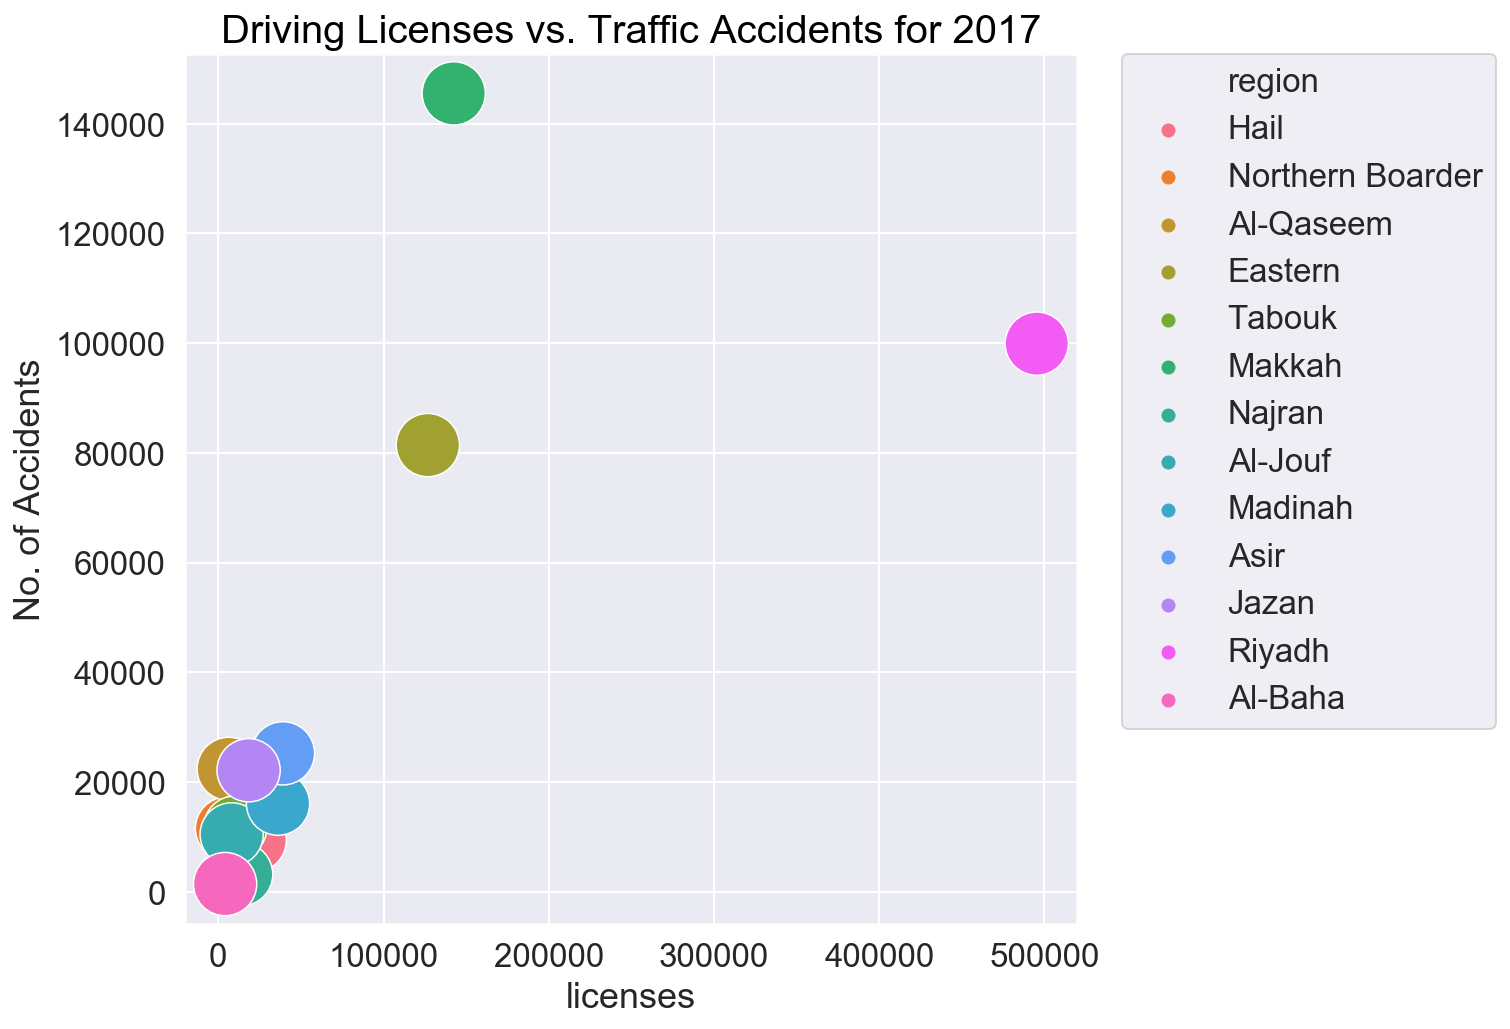

In [340]:
# Driving Licenses vs. Traffic Accidents for 2017

font = {
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
plt.figure(figsize=(8,8))

dd = sns.scatterplot(x="licenses", y="No. of Accidents",
                     s=1000,data=combined_datasets2017, hue ="region")

plt.title("Driving Licenses vs. Traffic Accidents for 2017",fontdict=font)
#plt.legend(loc='upper right')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

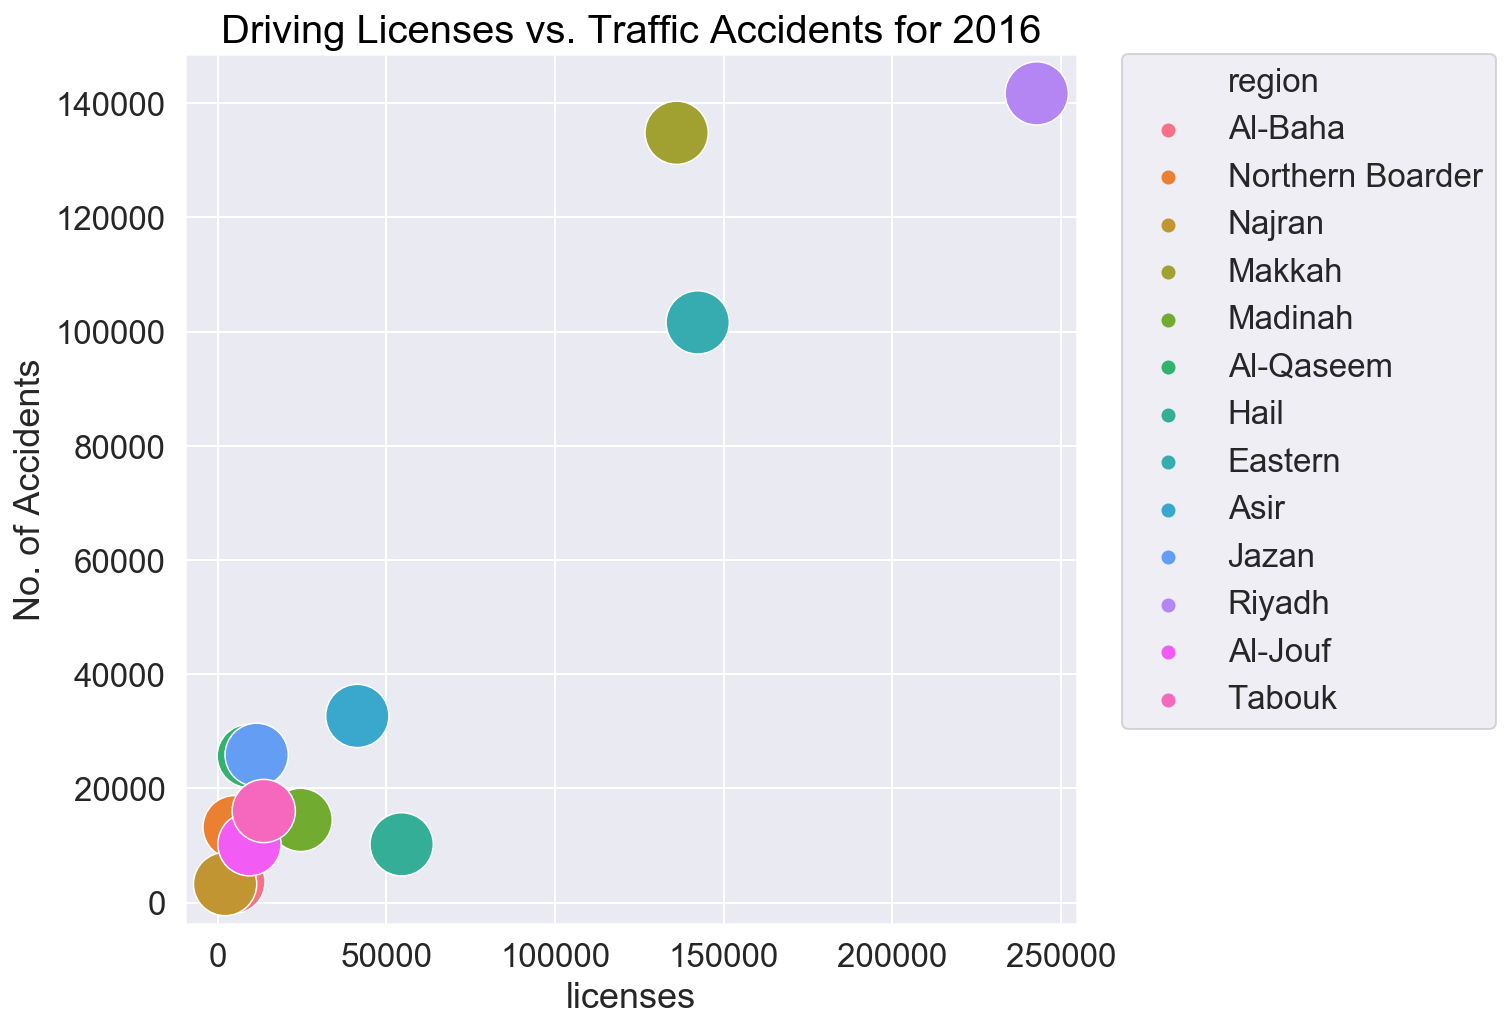

In [341]:
# Driving Licenses vs. Traffic Accidents for 2016

font = {
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
plt.figure(figsize=(8,8))

ad = sns.scatterplot(x="licenses", y="No. of Accidents",s=1000,hue ="region",data=combined_datasets2016)

plt.title("Driving Licenses vs. Traffic Accidents for 2016",fontdict=font)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Text(0.5, 1.0, 'Traffic Accidents for 2016 vs 2017')

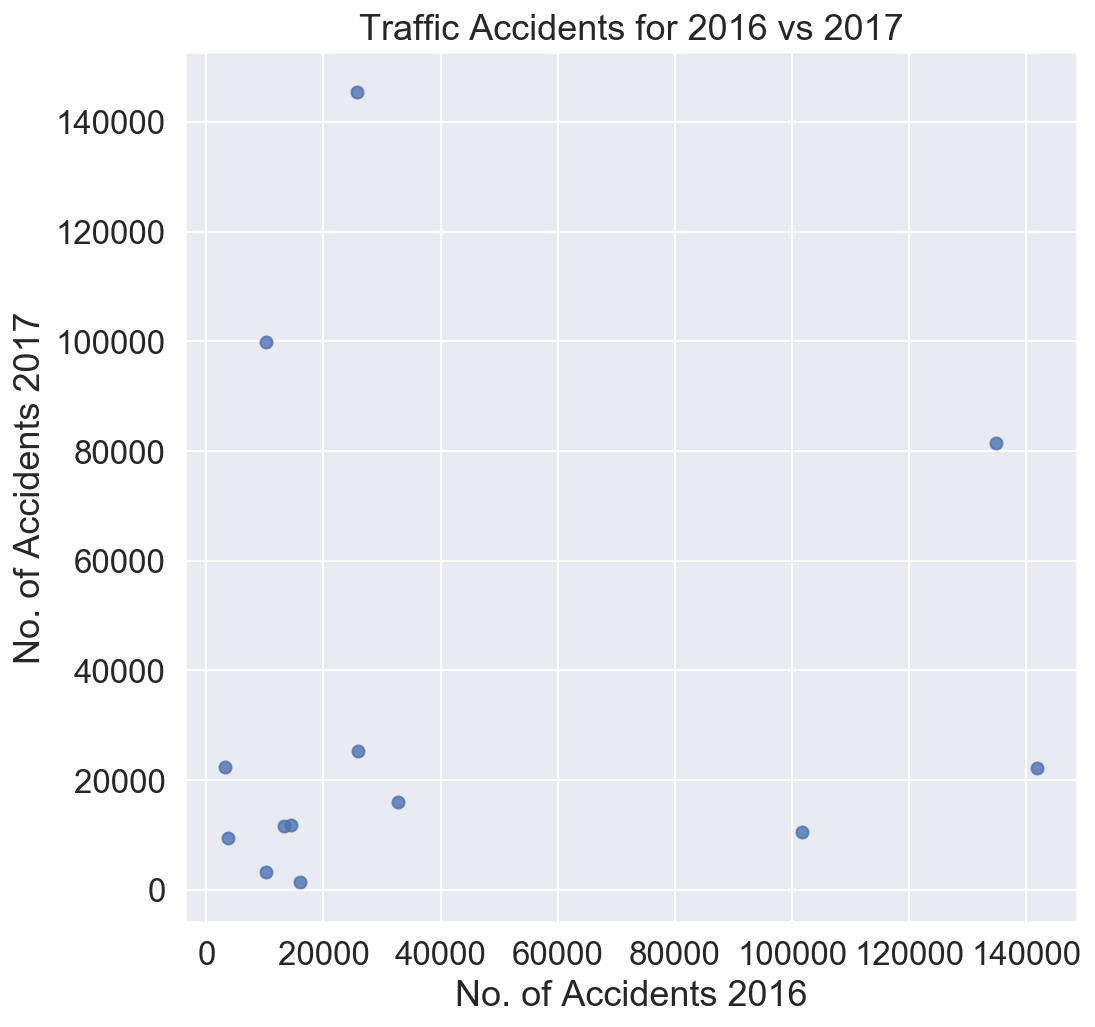

In [343]:
#Traffic Accidents for 2016 vs 2017
plt.figure(figsize=(8,8))
font = {
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
ddd = sns.regplot(combined_datasets12["No. of Accidents"][combined_datasets12.year==2016],
                     combined_datasets12["No. of Accidents"][combined_datasets12.year==2017],
                 data=combined_datasets12,fit_reg=False)
plt.xlabel("No. of Accidents 2016")
plt.ylabel("No. of Accidents 2017")

plt.title("Traffic Accidents for 2016 vs 2017")

Text(0.5, 1.0, 'Driving Licenses for 2016 vs 2017')

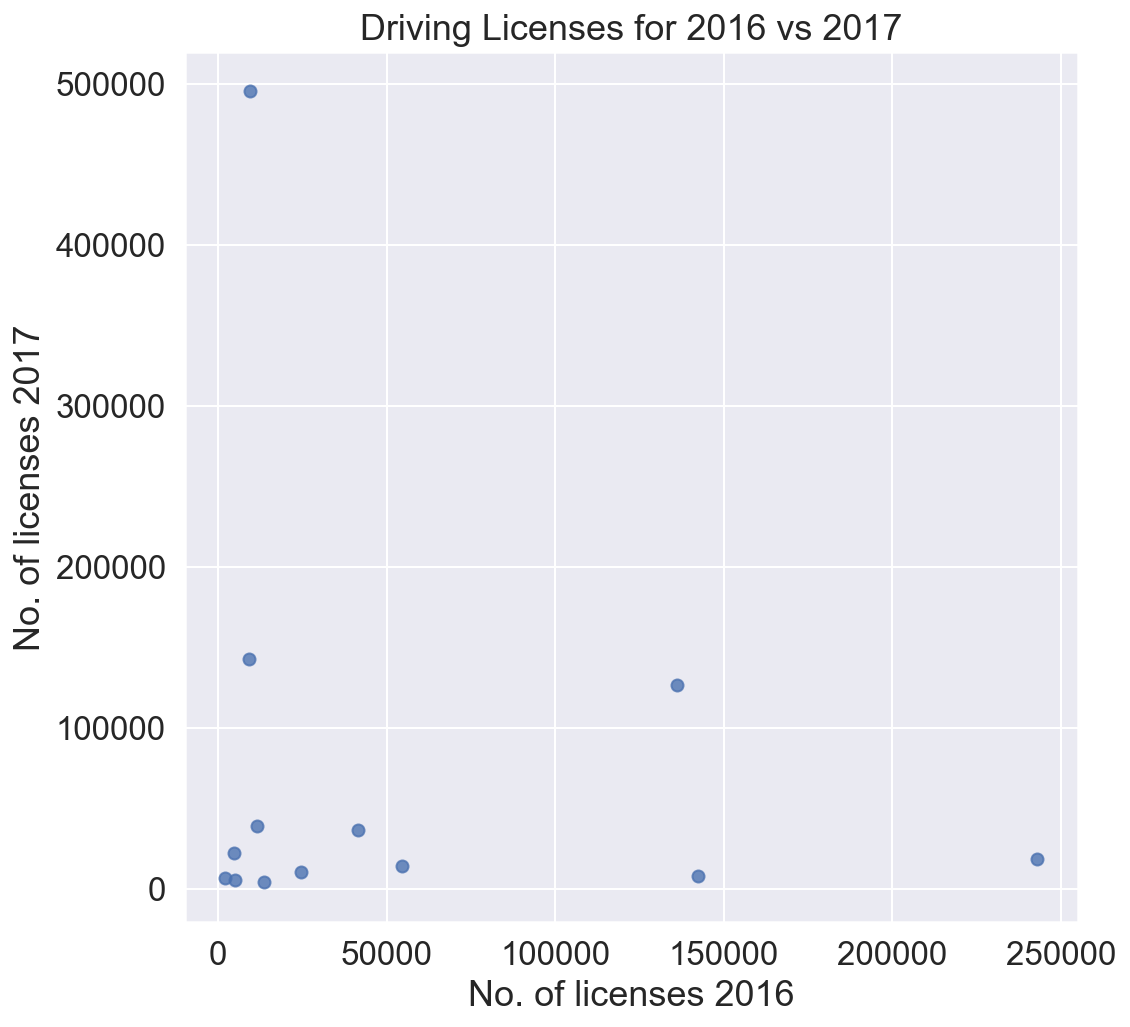

In [316]:
#Driving Licenses for 2016 vs 2017
plt.figure(figsize=(8,8))

ll = sns.regplot(combined_datasets.licenses[combined_datasets.year==2016],
                     combined_datasets.licenses[combined_datasets.year==2017]
                 ,data=combined_datasets,fit_reg=False)
plt.xlabel("No. of licenses 2016")
plt.ylabel("No. of licenses 2017")

plt.title("Driving Licenses for 2016 vs 2017")

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [317]:

combined_datasets333=combined_datasets12[["licenses","No. of Accidents","No. of Casualties - Dead",
                                       "No. of Casualties - Injured"]]
scaler= StandardScaler()
combined_datasets333 = pd.DataFrame(scaler.fit_transform
                                    (combined_datasets333[["licenses","No. of Accidents",
                                                           "No. of Casualties - Dead",
                                       "No. of Casualties - Injured"]]),
                                    columns=[["licenses","No. of Accidents","No. of Casualties - Dead",
                                       "No. of Casualties - Injured"]])



#combined_datasets333[["year","region"]]=combined_datasets12[["year","region"]]


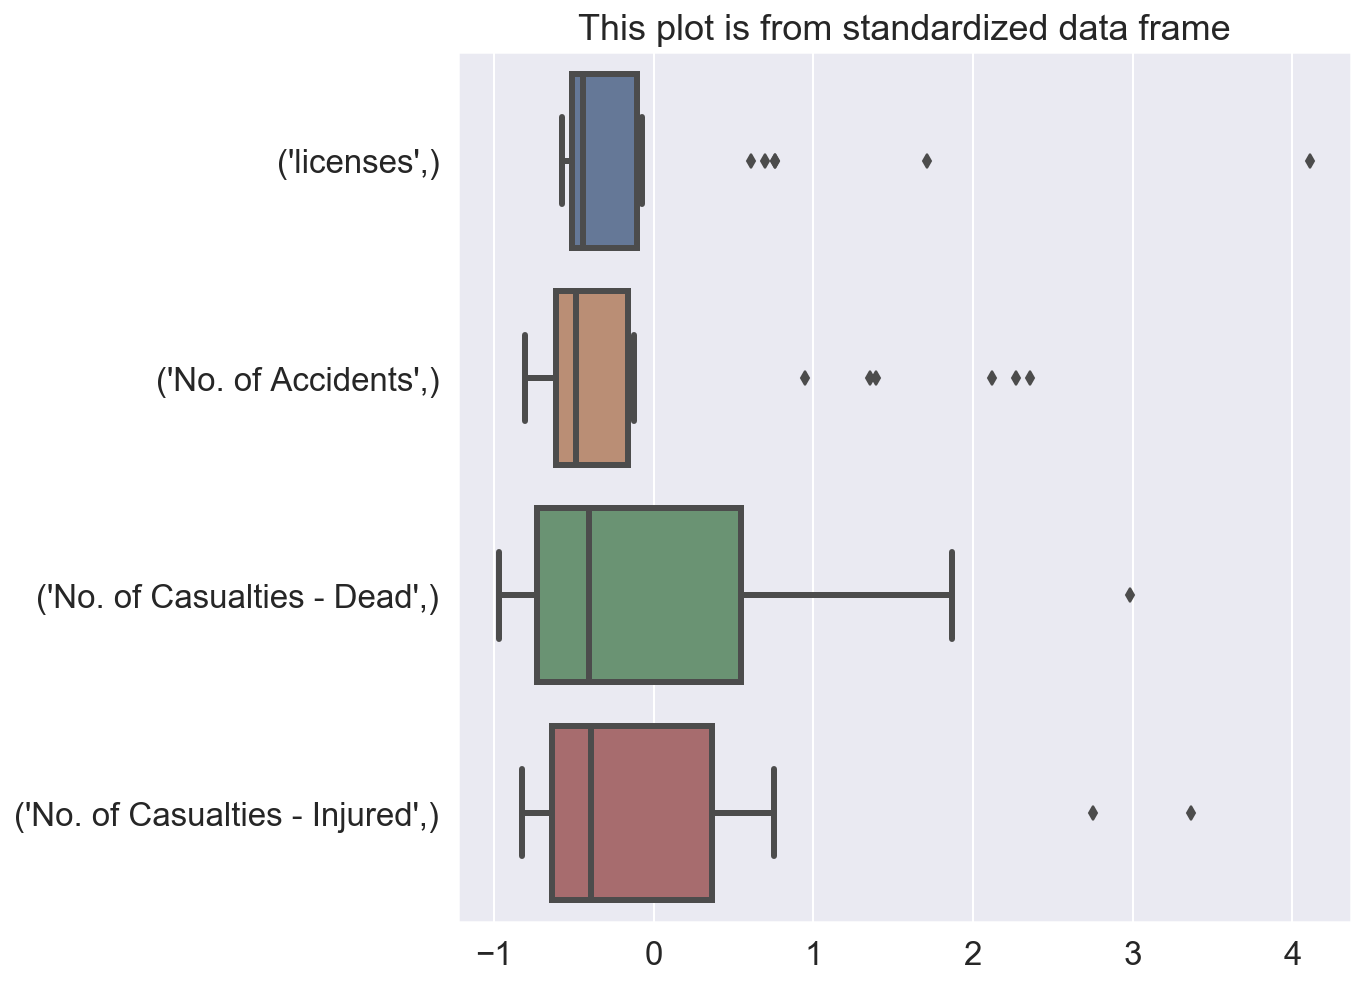

In [345]:
#combined_datasets333
plt.figure(figsize=(8,8))
sns.boxplot(data=combined_datasets333, orient='h', fliersize=5, 
                 linewidth=3, notch=False, saturation=0.5)
plt.title('This plot is from standardized data frame')
plt.show()

# in the below table 
1- the values are for the number of Casualties (Dead) in each year. 

2- igonr the first column called year, it's just an index

3- # the % represent how much the 2017 Casualties (Dead) in each region represent from the 2016 for the same region


In [328]:
severity_pivot=pd.pivot_table(data=combined_datasets12,values="No. of Casualties - Dead",columns="year",index="region")


severity_pivot.reset_index(inplace = True)
severity_pivot["%"]= (((severity_pivot[2017]-severity_pivot[2016])/severity_pivot[2016])*100)
severity_pivot["%"]=severity_pivot["%"].apply(lambda x: round(x))
severity_pivot=severity_pivot.sort_values(by=["%"])
severity_pivot = severity_pivot[['region',2016,2017,'%']]
t=["region","2016 #of Casualties (Dead)","2017 #of Casualties (Dead)"," % difference "]
severity_pivot.columns=t

severity_pivot.head()

,region,2016 #of Casualties (Dead),2017 #of Casualties (Dead),% difference
10,Northern Boarder,193.0,112.0,-42
7,Madinah,822.0,580.0,-29
0,Al-Baha,185.0,134.0,-28
8,Makkah,2243.0,1641.0,-27
2,Al-Qaseem,397.0,319.0,-20


# in the below table 
1- the values are for the number of Accidents 

2- igonr the first column called year, it's just an index

3- # the % represent how much the 2017 accents in each region represent from the 2016 for the same region

In [325]:
#the values are for the number of Accidents 
#the % represent how much the 2017 accents in each region represent from the 2016 for the same region
#igonr the fierst column called year, it's just an index
Accidents_pivot=pd.pivot_table(data=combined_datasets12,values="No. of Accidents",columns="year",index="region")
Accidents_pivot
Accidents_pivot.reset_index(inplace = True)


Accidents_pivot["%"]= (((Accidents_pivot[2017]-Accidents_pivot[2016])/Accidents_pivot[2016])*100)
Accidents_pivot["%"]=Accidents_pivot["%"].apply(lambda x: round(x))
Accidents_pivot=Accidents_pivot.sort_values(by=["%"])
Accidents_pivot = Accidents_pivot[['region',2016,2017,'%']]
w=["region","2016 #of Accidents","2017 #of Accidents"," % of Accidents difference "]
Accidents_pivot.columns=w
Accidents_pivot.head()

,region,2016 #of Accidents,2017 #of Accidents,% of Accidents difference
0,Al-Baha,3618.0,1414.0,-61
11,Riyadh,141736.0,99925.0,-29
12,Tabouk,16031.0,11713.0,-27
3,Asir,32684.0,25245.0,-23
4,Eastern,101619.0,81433.0,-20


# in the below table 
1- the values are for the number of licenses 
 

2- igonr the first column called year, it's just an index

3- # the % represent how many issued licenses in 2017 in each region represents from the 2016 for the same region

In [329]:
# the values are for the number of licenses 

#igonr the fierst column called year, it's just an index

licenses_pivot=pd.pivot_table(data=combined_datasets12,values="licenses",columns="year",index="region")


licenses_pivot.reset_index(inplace = True)


licenses_pivot["%"]= (((licenses_pivot[2017]-licenses_pivot[2016])/licenses_pivot[2016])*100)
licenses_pivot["%"]=licenses_pivot["%"].apply(lambda x: round(x))
licenses_pivot=licenses_pivot.sort_values(by=["%"],ascending=True)
f=["region","2016 #of licenses ","2017 #of licenses ","% of licenses difference"]
licenses_pivot.columns=f
licenses_pivot.head()

,region,2016 #of licenses,2017 #of licenses,% of licenses difference
5,Hail,54507,22035,-60
2,Al-Qaseem,9180,6318,-31
12,Tabouk,13610,10232,-25
1,Al-Jouf,9371,8091,-14
4,Eastern,142307,126816,-11


#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [330]:
from scipy.stats import skew 
import numpy as np  
import pylab as p  
  
x = Driving_Licenses.licenses
y= combined_datasets12["No. of Accidents"]
w= combined_datasets12['No. of Casualties - Dead']
j=combined_datasets12['No. of Casualties - Injured']



print('Skewness for licenses : ', skew(x))
print('Skewness for No. of Accidents : ', skew(y))
print('Skewness for No. of Casualties - Dead', skew(w))
print('Skewness for No. of Casualties - Injured', skew(j))

Skewness for licenses :  4.157901976472064
Skewness for No. of Accidents :  1.399305603495413
Skewness for No. of Casualties - Dead 1.3236238146678647
Skewness for No. of Casualties - Injured 2.1677134485335063


# Answers:
for all the following featuers:

1- number of issued licenses

2- No. of Accidents

3-No. of Casualties - Dead

4- No. of Casualties - Injured

we first need to remove oultiers, then check the distrbution again, but in genral the prpblem is in the quantity of the data and not in the data itself.we need more data to form an opinion about the distrbution of each of the these features. according to the central limit theorem.

with or without removing outliers we, we can see with a diffrent degree from each feature to the other, a positvaly skwed distrbution.


skewness = 0 : normally distributed.

skewness > 0 : more weight in the left tail of the distribution.

skewness < 0 : more weight in the right tail of the distribution. 

In [331]:
from scipy.stats import skew 
import numpy as np  
import pylab as p  
  
x = Driving_Licenses.licenses
y= combined_datasets12["No. of Accidents"]
w= combined_datasets12['No. of Casualties - Dead']
j=combined_datasets12['No. of Casualties - Injured']



print('Skewness for licenses : ', skew(x))
print('Skewness for No. of Accidents : ', skew(y))
print('Skewness for No. of Casualties - Dead', skew(w))
print('Skewness for No. of Casualties - Injured', skew(j))

print ("none is even close to zero, so none it's close to be normal")

Skewness for licenses :  4.157901976472064
Skewness for No. of Accidents :  1.399305603495413
Skewness for No. of Casualties - Dead 1.3236238146678647
Skewness for No. of Casualties - Injured 2.1677134485335063
none is even close to zero, so none it's close to be normal


#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

# Answer:
as we saw in the histograms, none of them is normally distrbuted, but i refer that to the low number of observations, in ordrer to "assume normallty, we need to do apply CLT which asks for atleast 30 points 
("doesn't always work, some time we need more), in this data for each region we only have 2 points (number of accedents and number of licenses) total of 26 observation - not even 30 for any of the fetuears.

the right approch is to take more than 30 observation (by far) for each region and analysi them sepratlly since each region have diffrent type of people, streets, education level, traditions, and so own, so we need to cluster the data into regions.






Does This Assumption Hold for:
    - Driving Licenses
    - Traffic Accidents
Explain your answers for each distribution and how you think this will affect estimates made from these data.

# Answer:
for all not only for the these 2 featuers, the problem is in the quantity of the observations.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [332]:
# Code

## Outside Research

Based upon your observations, choose **three** regions that demonstrate interesting trends in the number of driving licenses and traffic accidents. Spend some time doing outside research on provincial and central policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

# Answer:
i decided to foucs more in the top 3 regions in terms of No. of Accidents and number of issued licenses. which are eastrn province, makkah and riyadh as you will see in the following graphs

makkah is the only place where in 2017 had more Accidents then 2016

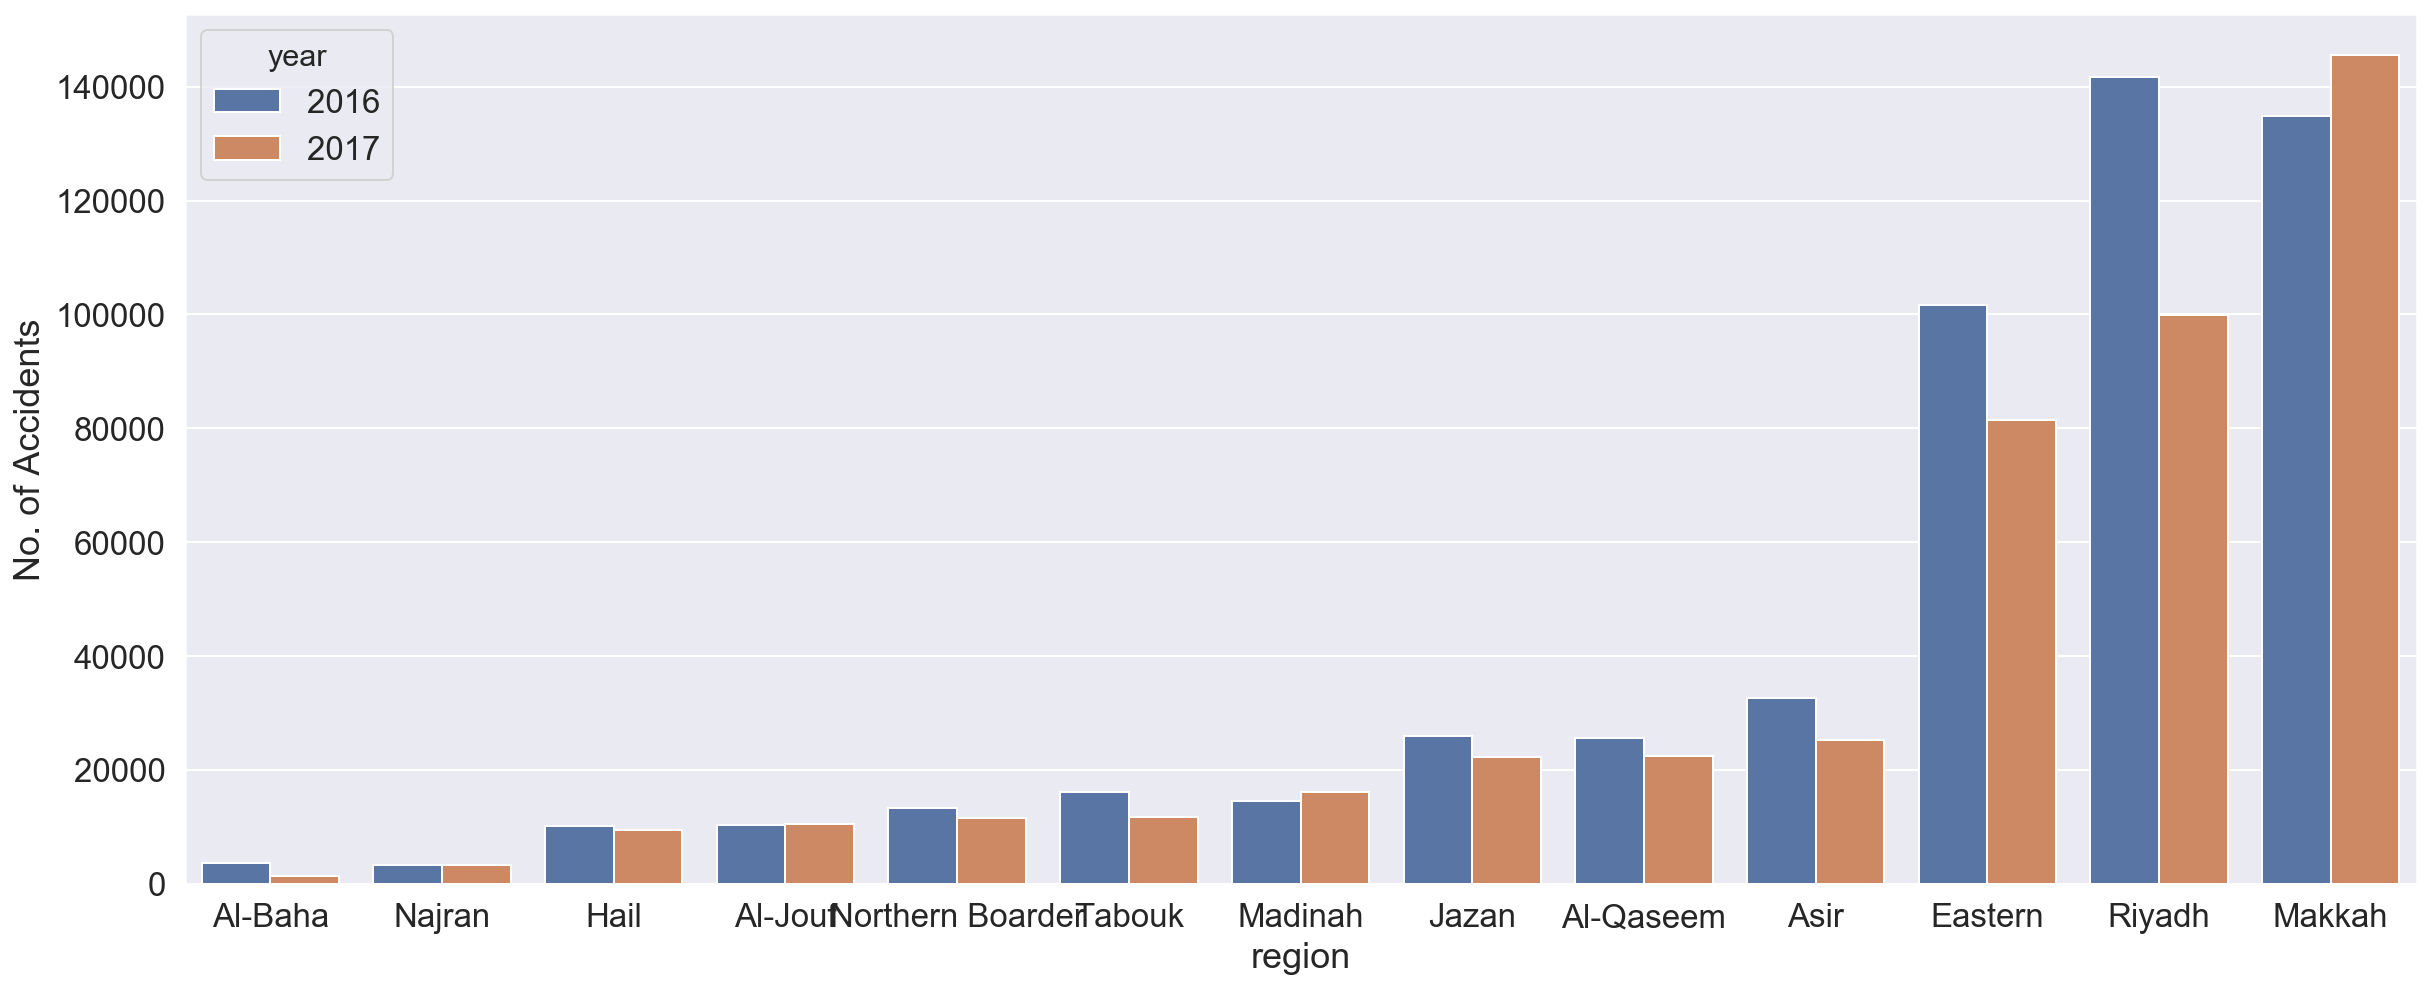

In [333]:
# number of Accidents in both years for each region
plt.figure(figsize=(20,8))
t= combined_datasets12.sort_values(by=["No. of Accidents"])
sns.barplot(data=t,x="region",y="No. of Accidents",hue="year")

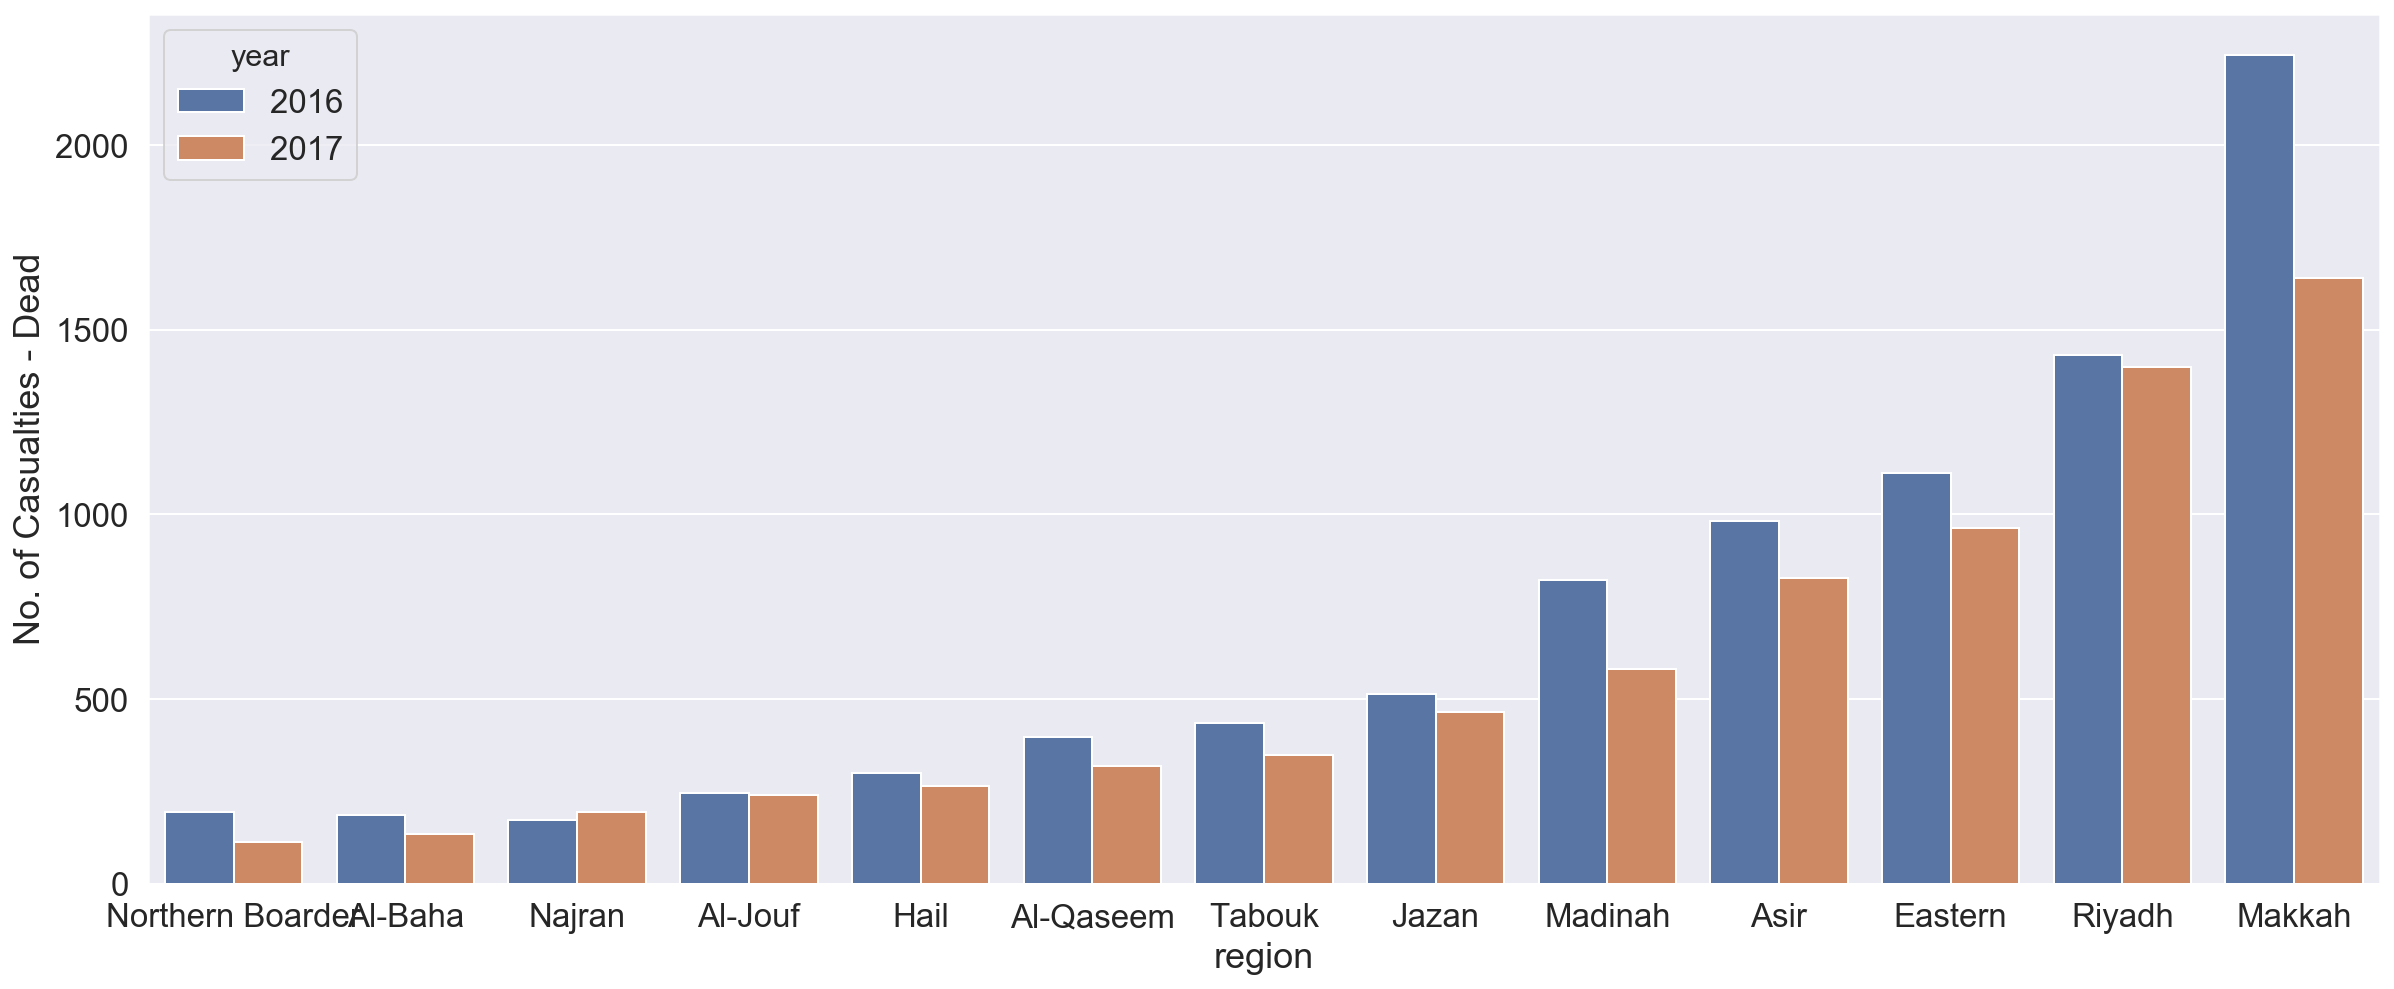

In [334]:
# No. of Casualties - Dead in both years
plt.figure(figsize=(20,8))
w= combined_datasets12.sort_values(by=["No. of Casualties - Dead"])
sns.barplot(data=w,x="region",y="No. of Casualties - Dead",hue="year")

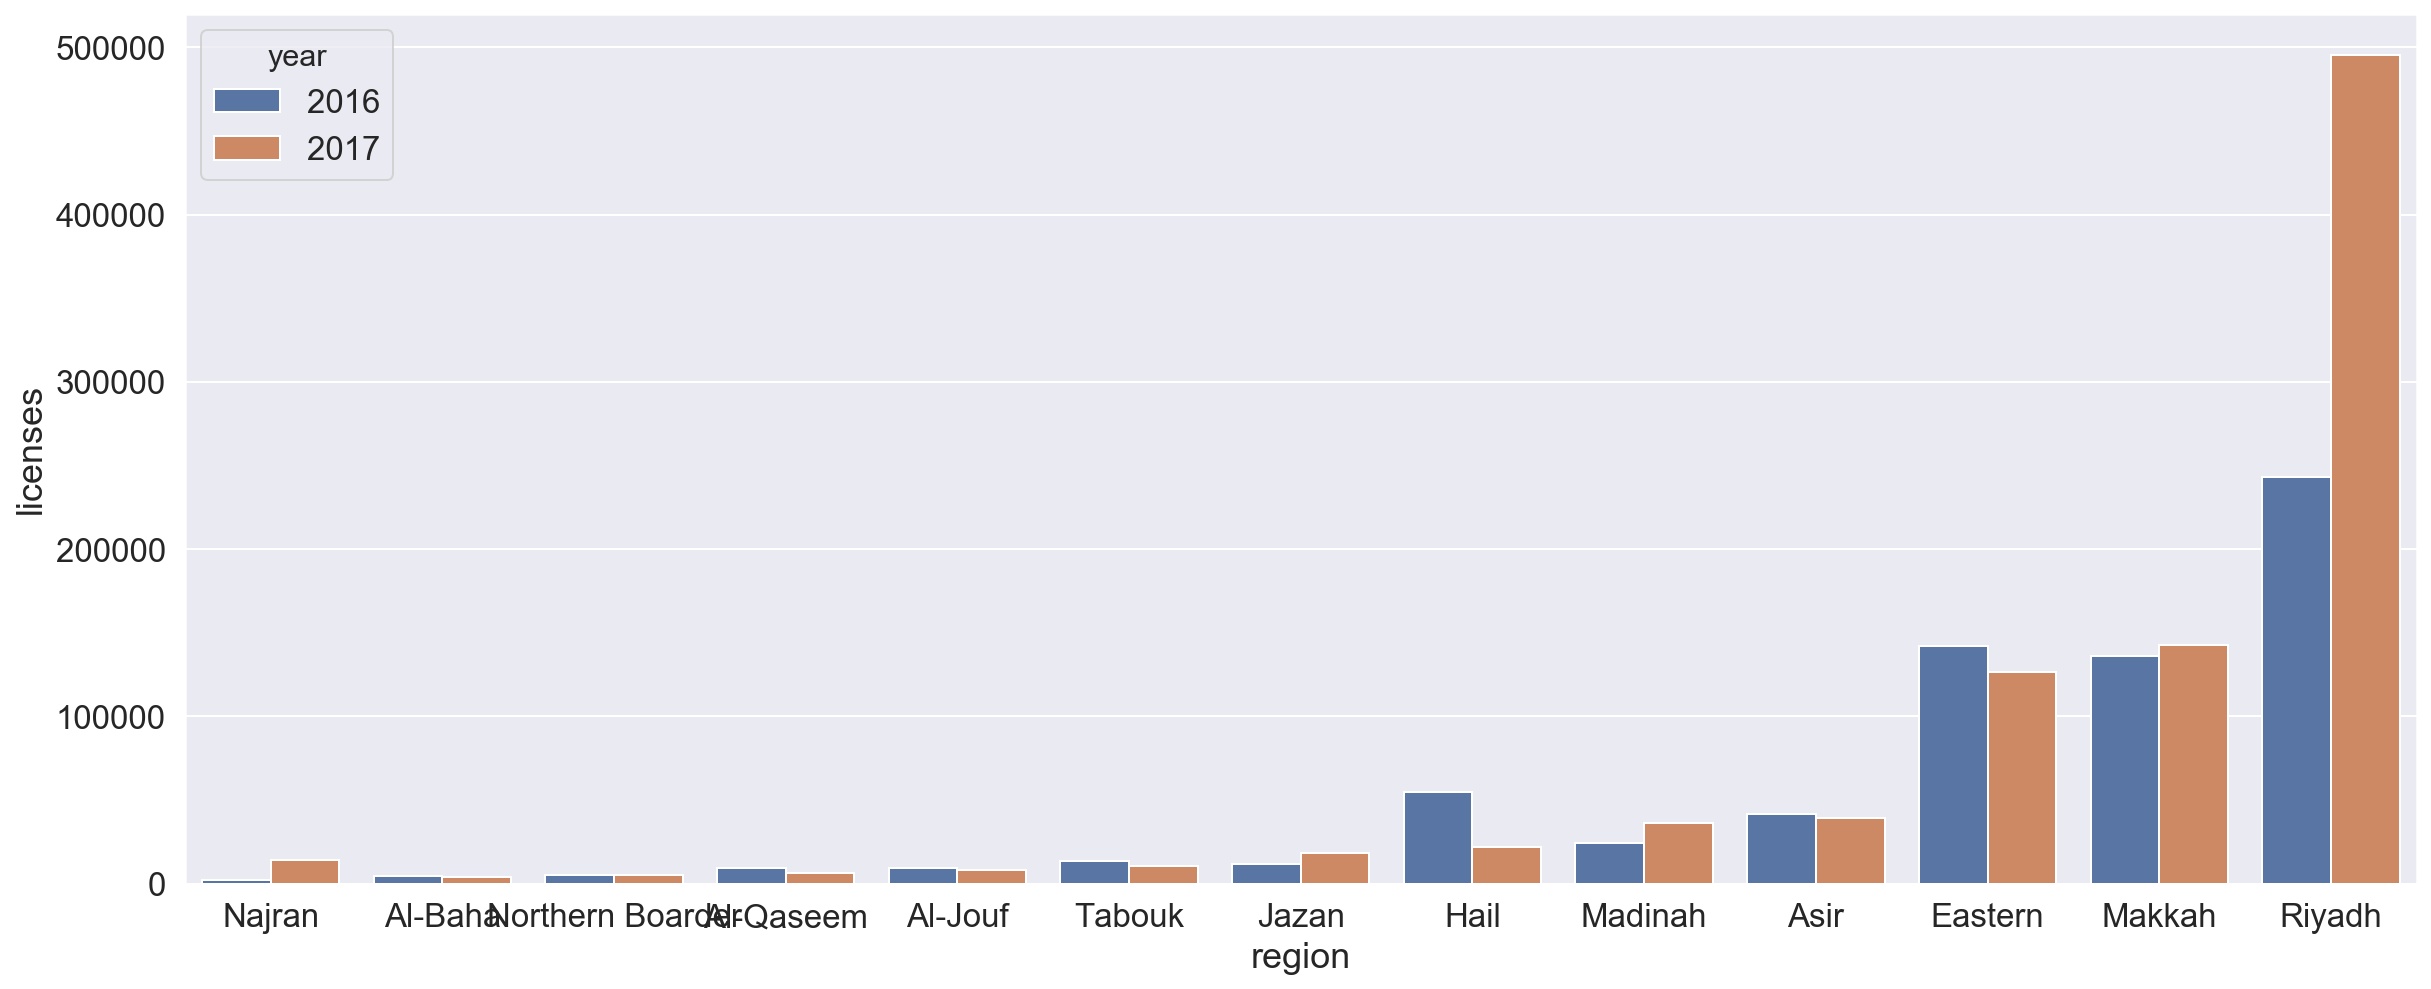

In [335]:
#number of issued licenses in both years 
plt.figure(figsize=(20,8))
v= combined_datasets12.sort_values(by=["licenses"])
sns.barplot(data=v,x="region",y="licenses",hue="year")

 # My Research is based on 3 things:
 1- the nationality of the population in each of these 3 regions obtained from the general authority of statistics
 
 2- types and quantity of the Traffic Violations in each of these 3 regions obtained from the general authority of statistics
 
 3- the number of slums neighborhoods in each of those cities
note: links for the refrences will be added at the end of this file 
 

# none-saudi population

Eastrn provence's population for none saudi males in the mid of 2016 is 1.262452 millions

Makkah's population or none saudi males in the mid of 2016 is 2.485601 millions 

Riyadh's population or none saudi males in the mid of 2016 is 2.365870 millions


we can see the huge size of non saudi population in makkah, it's  more than riyadh without mentioning the area diffrence! different people from different background in a small area will reflect misunderstanding in a driving way, especially that a lot of them ( non-sadi in Makkah) are illegal immigrants  and so they never went through the learning course and the test that qualify you to get an official  the driving  licenses.
check the below figures.

‎⁨الشرقية ٢٠١٦⁩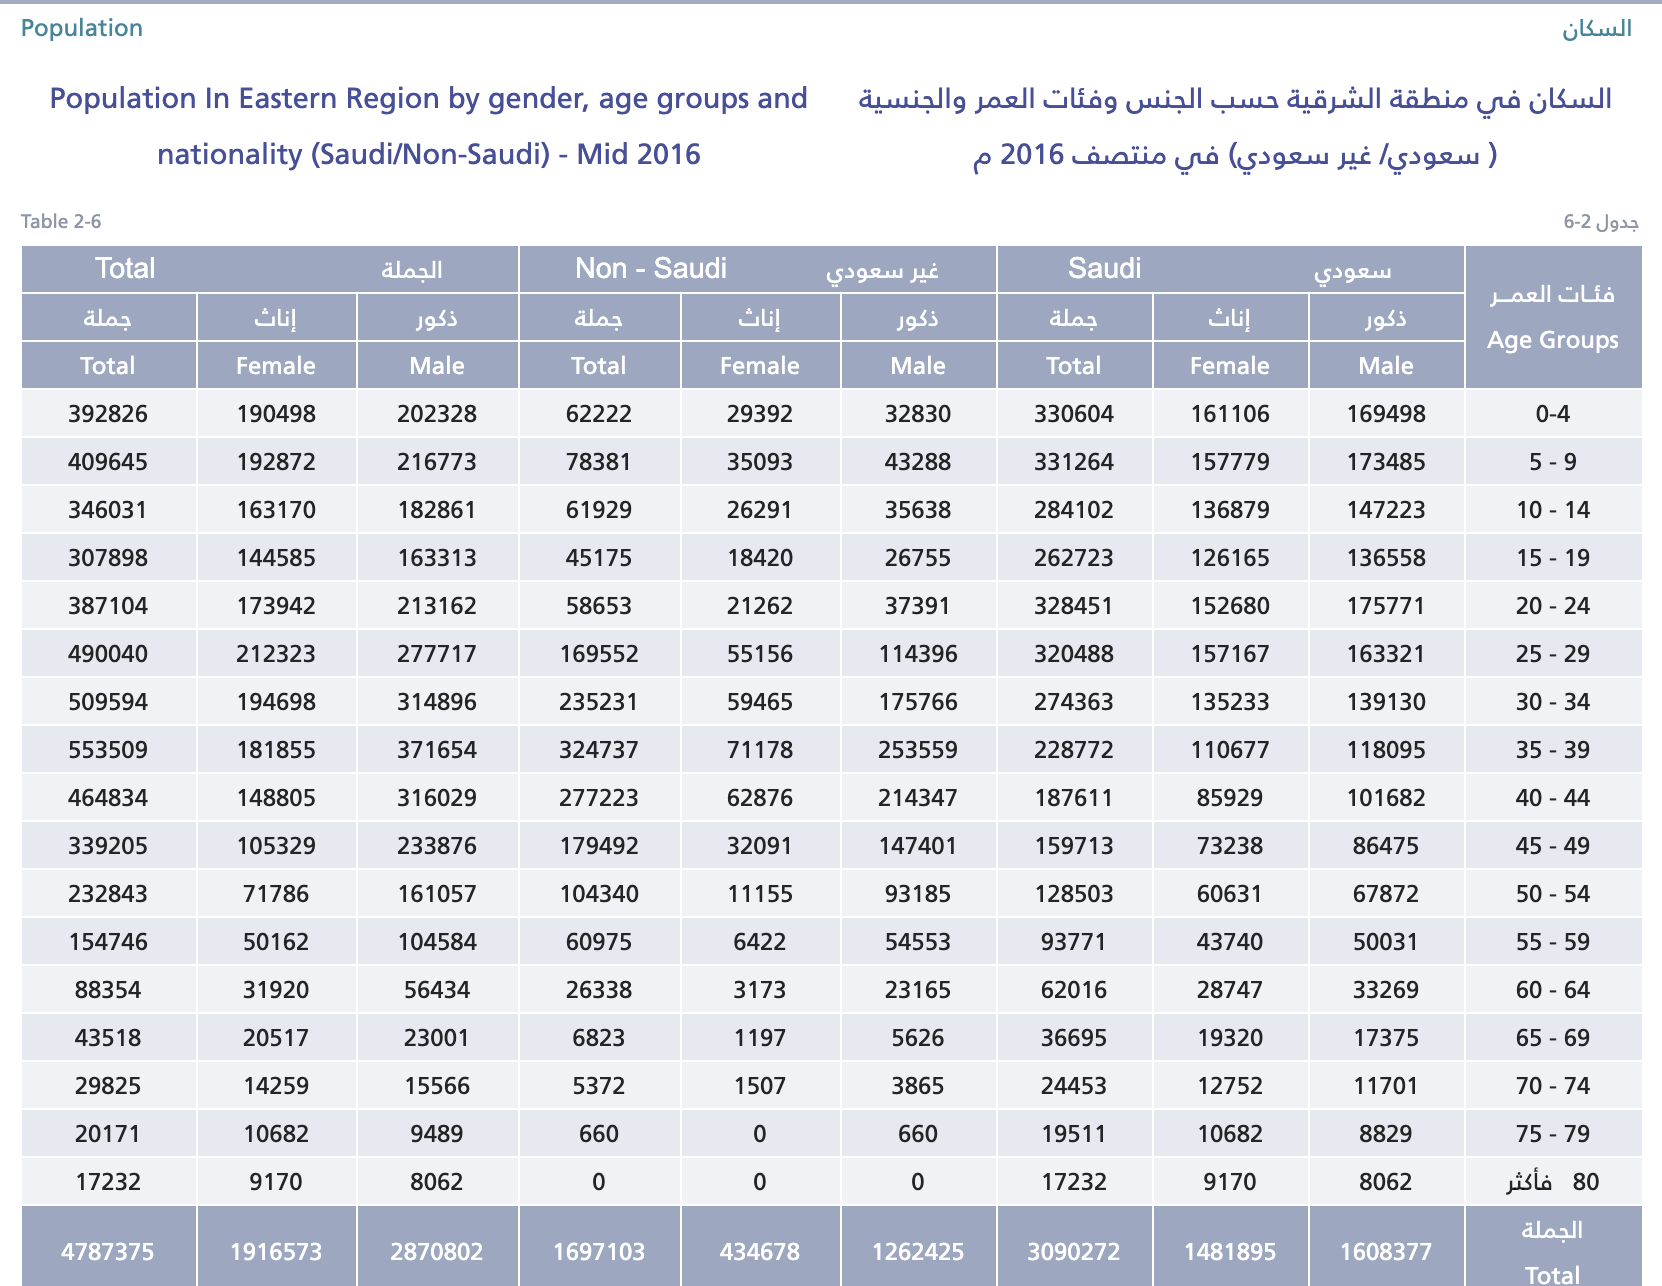

‎⁨مكة ٢٠١٦⁩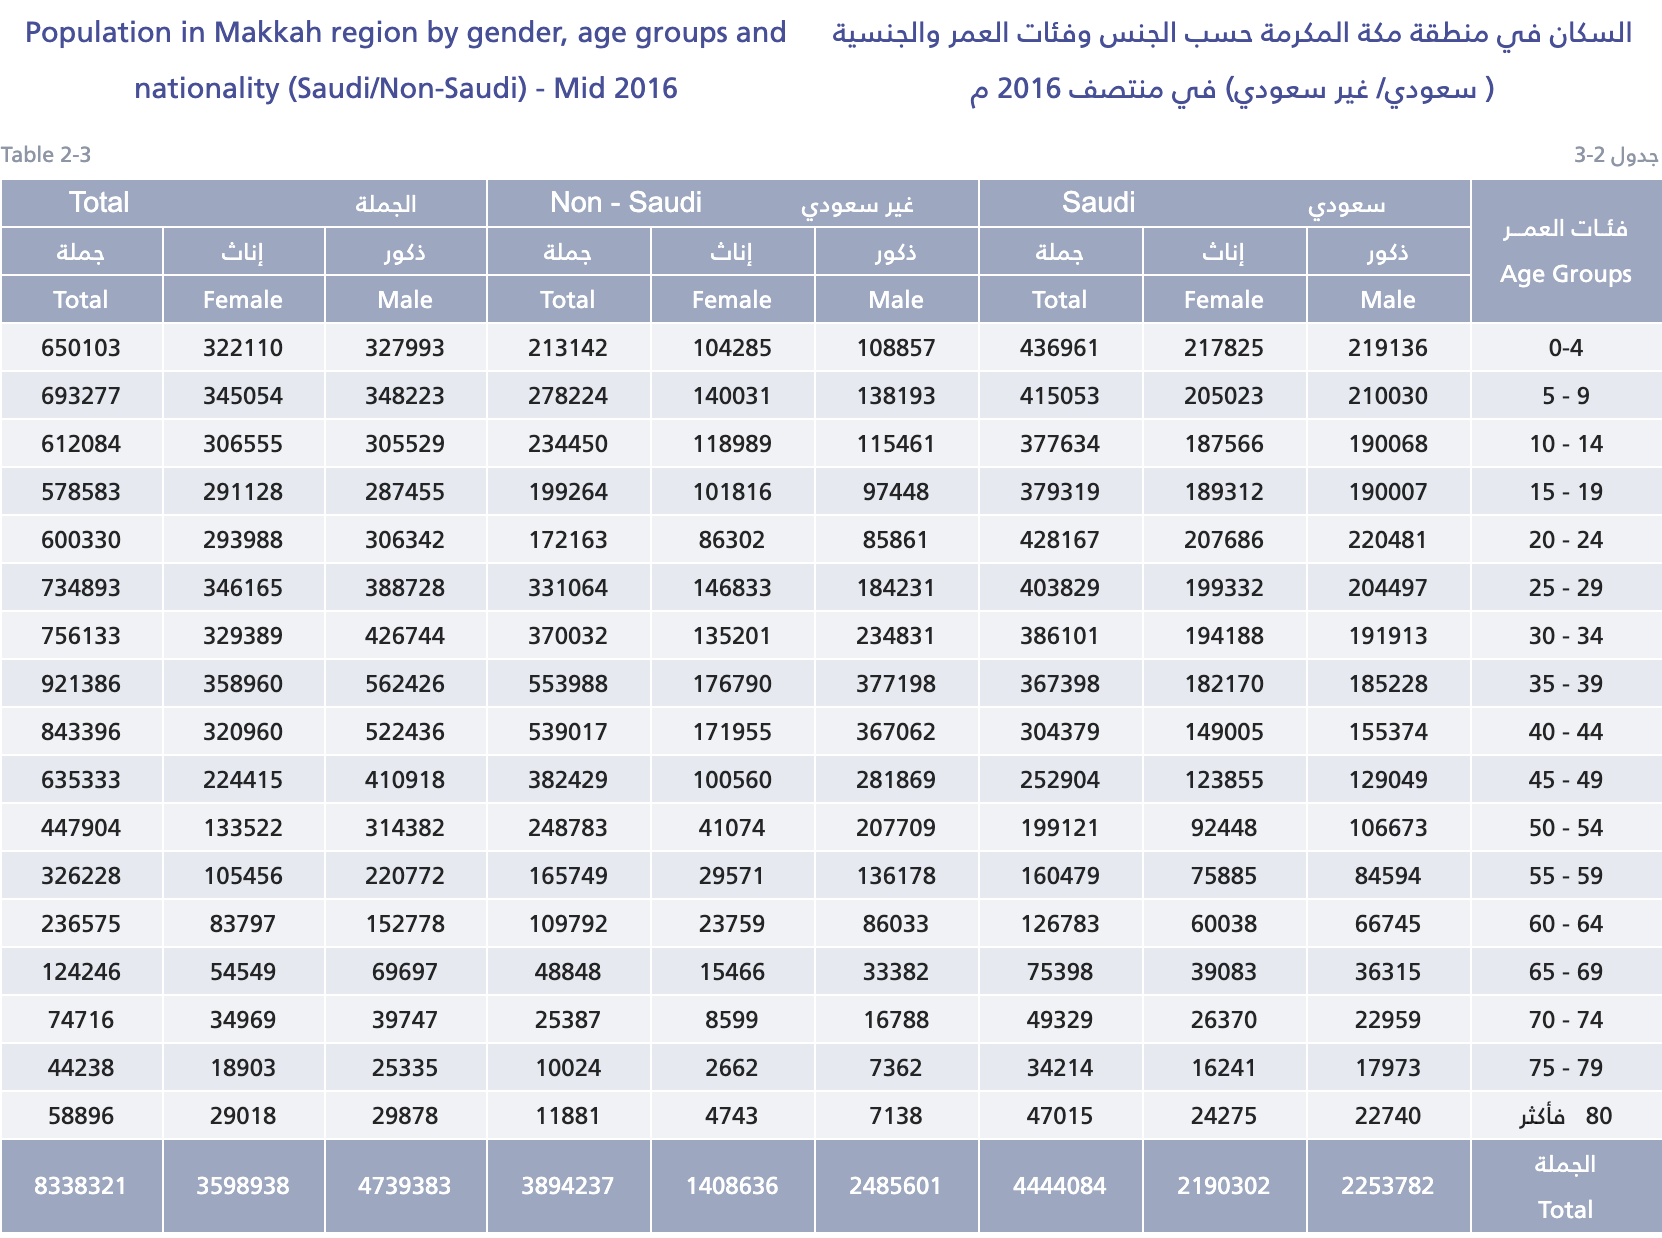

‎⁨الرياض 2016⁩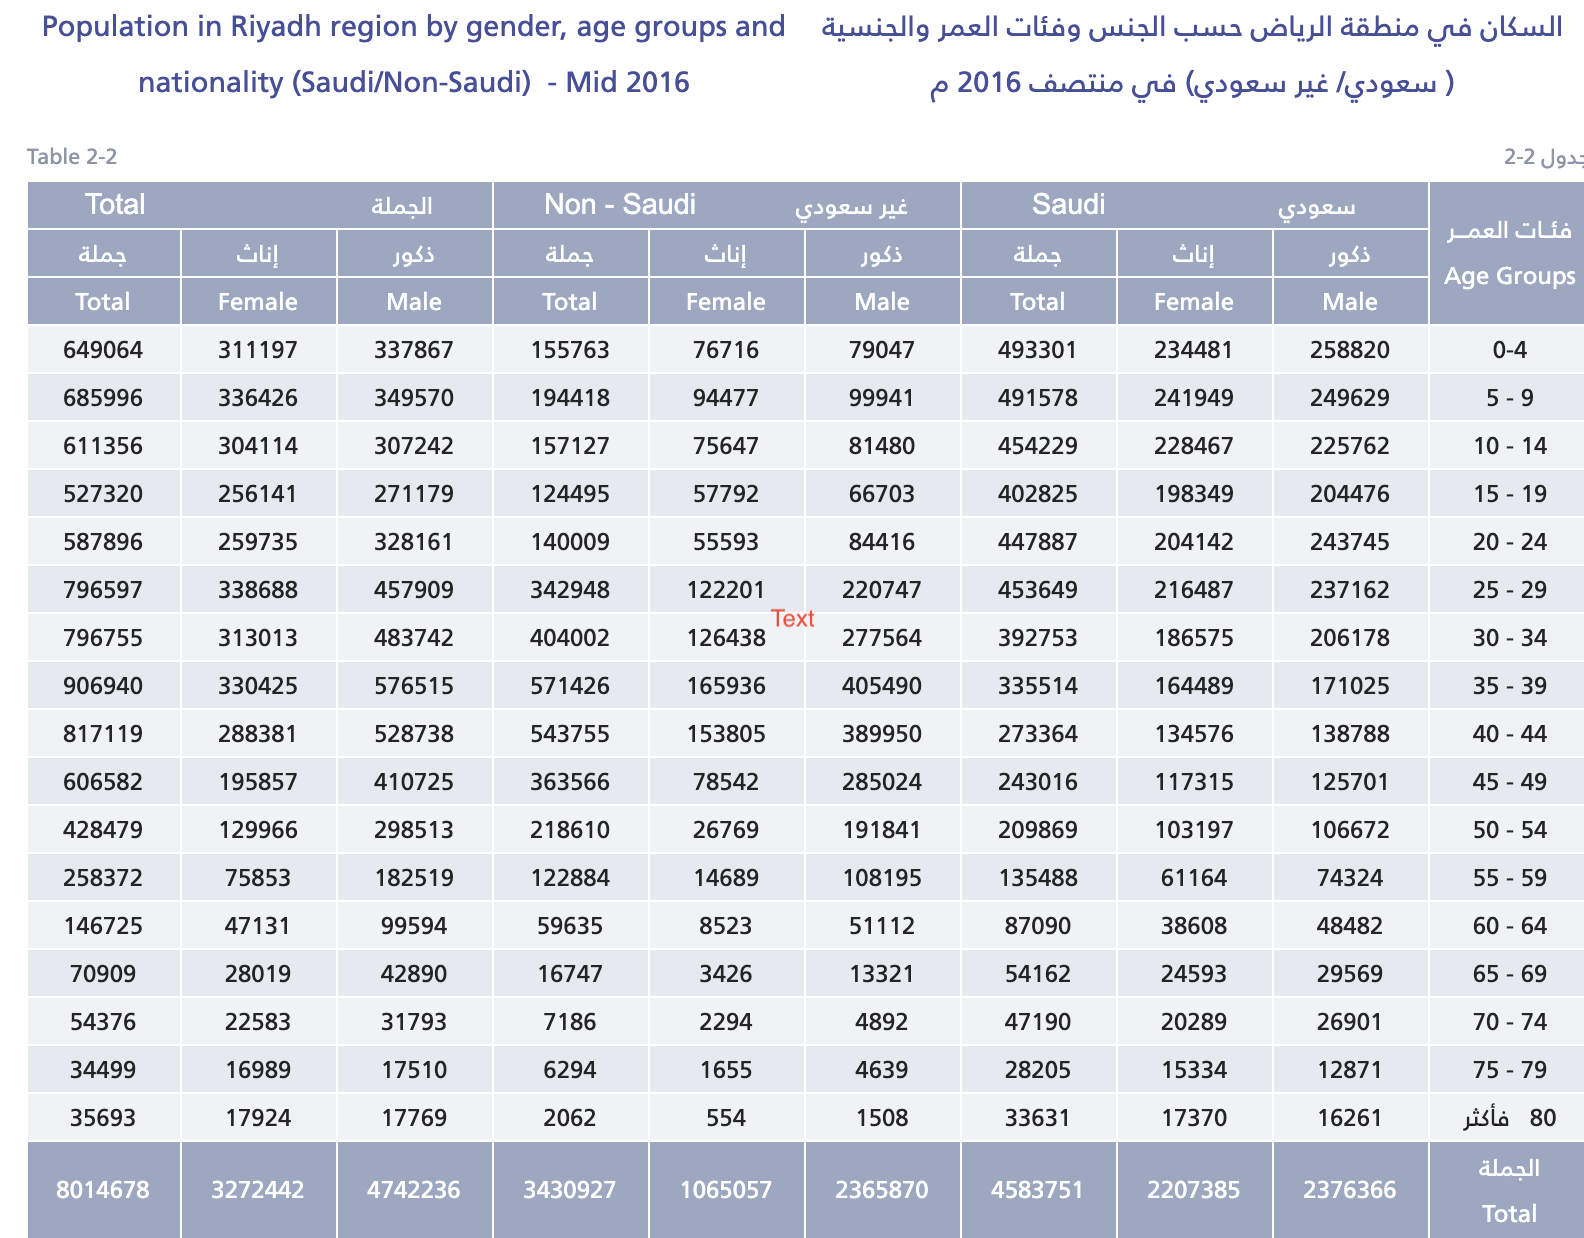

# Traffic Violation 2017
the second issue is the number of Traffic Violations in those regions 

we have so many types of Traffic Violation, but I'm only focusing on the types where the Makkah got noticeably higher count than the 2 others, check the following graph: 
1- using the phone while driving: Makkah has double the quantity  from the closest city which is Riyadh
2- wrong parking: Makkah has an enormous amount of tickets 
3- Not to buckle up seat belt in Makkah is also ahead of any other region.

Screen Shot 2019-10-24 at 17.48.37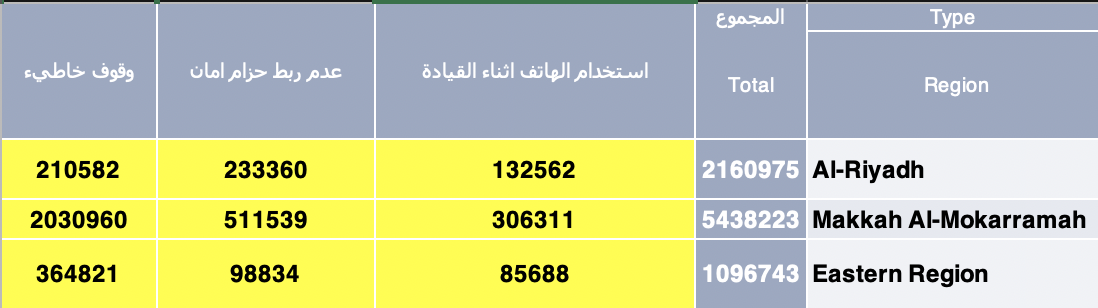

# Slums neighborhoods

1- in 2016 in makkah we had more than  65 slums neighborhoods which affected the street movements and design. even in Jeddah which is in Makkah, in 2019 there are still 60 slums neighborhoods

2-in Riyadh in 2015, the slums neighborhoods were only considered to be 1% of the Urban Area in the city

3-in the eastern province, we don't have slums neighborhoods

# Refrences

1- general authority of statistics (population)
file:///Users/yezy/Desktop/%D8%A7%D9%84%D9%83%D8%AA%D8%A7%D8%A8%20%D8%A7%D9%84%D8%A7%D8%AD%D8%B5%D8%A7%D9%8A%D9%94%D9%8A%202016-52/Pages/MixPageOne.htm

2- general authority of statistics (Traffic Violations)

https://www.stats.gov.sa/ar/6008

3- makkah 

http://www.alhayat.com/article/793943/%D9%85%D9%83%D8%A9-%D8%AA%D8%B3%D8%B9%D9%89-%D8%A5%D9%84%D9%89-%D8%A7%D9%84%D8%AA%D8%AE%D9%84%D8%B5-%D9%85%D9%86-67-%D8%AD%D9%8A%D8%A7-%D8%B9%D8%B4%D9%88%D8%A7%D8%A6%D9%8A%D8%A7-%D9%88%D8%A7%D9%84%D8%B3%D8%B9%D9%88%EF%BF%BD

4- jeddah 

https://www.al-madina.com/article/622194

5- riyadh 

https://www.maaal.com/archives/82679 

6- Eastrn province 

http://www.alhayat.com/article/713669/-%D8%A3%D9%85%D8%A7%D9%86%D8%A9-%D8%A7%D9%84%D8%B4%D8%B1%D9%82%D9%8A%D8%A9-%D9%84%D8%A7-%D9%85%D9%86%D8%A7%D8%B7%D9%82-%D8%B9%D8%B4%D9%88%D8%A7%D8%A6%D9%8A%D8%A9-%D9%81%D9%8A-%D8%AD%D8%A7%D8%B6%D8%B1%D8%A9-%D8%A7%D9%84%D8%AF%D9%85%D8%A7%D9%85
    
7- the stat in the problem statment

http://saudigazette.com.sa/article/524118 

http://saudigazette.com.sa/article/529469

## Conclusions and Recommendations

- Based on your exploration of the data, what are you key takeaways and recommendations?

- Are there additional data you desire that would better inform your investigations?

# Answer:

solutions

1- remove the slums neighborhoods 

2-  foucs on minimizing thr number of the illegal immigrants, espicially in makkah.

3- emphisis on more restrections regarding the above mentioned 3 types of Traffic Violation